# Previsão de AVC com modelos de aprendizado de máquina (Machine Learning)

De acordo com o Centro de Controle e Prevenção de Doenças (CDC), um derrame, às vezes chamado de ataque cerebral, ocorre quando algo bloqueia o suprimento de sangue para parte do cérebro ou quando um vaso sanguíneo no cérebro se rompe. 

Em ambos os casos, partes do cérebro são danificadas ou morrem. Um derrame pode causar danos cerebrais duradouros, incapacidade de longo prazo ou até mesmo a morte. 

OBJETIVO: 

Este projeto visa prever se um paciente terá AVC ou não usando 6 algoritmos de aprendizado de máquina diferentes e determinar qual dos algoritmos é mais preciso para a previsão.

Esta previsão ajudará os pacientes a tomar medidas que lhes permitam evitar o risco futuro de sofrer um acidente vascular cerebral, especialmente porque implica trabalhar em relação às interações entre fatores causais, fatores predisponentes e estilos de vida pouco saudáveis que podem levar ao acidente vascular cerebral.

FONTE DO CONJUNTO DE DADOS USADO: O conjunto de dados usado para este projeto está disponível no Kaggel e contém registros médicos e recursos importantes necessários para treinar efetivamente os modelos que serão empregados para fazer as previsões corretas.

# Importar as bibliotecas necessárias

In [1]:
# Bibliotecas de manipulação de dados e analise

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

# Bibliotecas de gráfico

import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb

# Bibliotecas de previsões

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import scikitplot as skplt
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Pré-Processamento de dados

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

# Ignorar aviso de erros

import warnings
warnings.filterwarnings('ignore')


# Carregar e verificar os dados

In [3]:
# Carregar o arquivo csv

df = pd.read_csv('/home/felix_linux/Projetos/Acidente_Vascular-Cerebral/healthcare-dataset-stroke-data.csv')

In [4]:
# Visualizar as 5 primeiras linhas do arquivo

df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Informação sobre o Dataset

* id: identificador exclusivo
* gender: "Male", "Female" or "Other" ("Masculino", "Feminino" ou "Outro")
* age: idade do paciente
* hypertension: 0 e o paciente não tem hipertensão, 1 se o paciente tem hipertensão
* heart_disease: 0 se o paciente não tem nenhuma doença cardíaca, 1 se o paciente tem uma doença cardíaca
* ever_married: "No" or "Yes" ( É casado = "Sim" ou "Não"
* work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed" (Tipo de Trabalho = "Criança", "Trabalho Governamental", "Nunca Trabalhou", "Particular" ou "Autônomo")
* Residence_type: "Rural" ou "Urbano
* avg_glucose_level: nível médio de glicose no sangue
* bmi: índice de massa corporal
* smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* ("fumou antigamente", "nunca fumou", "fuma" ou "desconhecido")
* stroke: 1 se o paciente teve um AVC ou 0 se não *Note: "Unknown" em smoking_status significa que a informação não está disponível para este paciente

In [5]:
# Visualizar as 5 últimas linhas do arquivo

df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
# Verificar o tamanho do dataframe

df.shape

(5110, 12)

In [7]:
linhas = df.shape[0]
colunas = df.shape[1]

print(f'Quantidades de linhas : {linhas} e quantidades de colunas : {colunas}')

Quantidades de linhas : 5110 e quantidades de colunas : 12


In [8]:
# Verificar mais informações

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
# Verificar a estatísticas descritivas dos dados numéricos e arredondando para 2 casas decimais

round(df.describe(),2)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [10]:
# Verificar a estatísticas categóricas

df.describe(include=[object])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [11]:
# Verificar todas as estatísticas juntas

df.describe(include='all')

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,5110.000000,5110,5110.000000,5110.000000,5110.000000,5110,5110,5110,5110.000000,4909.000000,5110,5110.000000
unique,NaN,3,NaN,NaN,NaN,2,5,2,NaN,NaN,4,NaN
top,NaN,Female,NaN,NaN,NaN,Yes,Private,Urban,NaN,NaN,never smoked,NaN
freq,NaN,2994,NaN,NaN,NaN,3353,2925,2596,NaN,NaN,1892,NaN
mean,36517.829354,NaN,43.226614,0.097456,0.054012,NaN,NaN,NaN,106.147677,28.893237,NaN,0.048728
std,21161.721625,NaN,22.612647,0.296607,0.226063,NaN,NaN,NaN,45.283560,7.854067,NaN,0.215320
min,67.000000,NaN,0.080000,0.000000,0.000000,NaN,NaN,NaN,55.120000,10.300000,NaN,0.000000
25%,17741.250000,NaN,25.000000,0.000000,0.000000,NaN,NaN,NaN,77.245000,23.500000,NaN,0.000000
50%,36932.000000,NaN,45.000000,0.000000,0.000000,NaN,NaN,NaN,91.885000,28.100000,NaN,0.000000
75%,54682.000000,NaN,61.000000,0.000000,0.000000,NaN,NaN,NaN,114.090000,33.100000,NaN,0.000000


In [12]:
# Visualizando todas as colunas

df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Separando as variáveis do conjunto de dados

As variáveis podem ser classificadas em quatro tipos principais: qualitativas nominais, qualitativas ordinais, quantitativas contínuas e quantitativas discretas. A diferença entre eles está relacionada à natureza dos dados que essas variáveis representam. Vamos entender cada um desses tipos:

1. Variáveis Qualitativas Nominais:
   As variáveis qualitativas nominais representam atributos ou categorias que não possuem uma ordem específica. Elas descrevem características ou qualidades distintas, mas não possuem uma escala numérica associada. Exemplos de variáveis qualitativas nominais são: gênero (masculino, feminino), cor dos olhos (azul, castanho, verde), estado civil (solteiro, casado, divorciado) etc. Nesse tipo de variável, a única informação relevante é a categoria em que cada observação se enquadra.

2. Variáveis Qualitativas Ordinais:
   As variáveis qualitativas ordinais também representam atributos ou categorias, mas, ao contrário das variáveis nominais, possuem uma ordem ou hierarquia entre as categorias. Nesse caso, a escala é categórica e ordenada. Exemplos de variáveis qualitativas ordinais são: nível de satisfação (baixo, médio, alto), grau de educação (fundamental, médio, superior), classificação de dor (nenhuma dor, leve, moderada, intensa) etc. Nesse tipo de variável, a ordem entre as categorias é relevante, mas a diferença entre as categorias não é quantificável.

3. Variáveis Quantitativas Contínuas:
   As variáveis quantitativas contínuas representam valores numéricos que podem assumir uma infinidade de valores dentro de um intervalo contínuo. Elas são medidas em uma escala numérica e podem ter precisão arbitrária. Exemplos de variáveis quantitativas contínuas são: altura (por exemplo, 1,75 metros), peso (por exemplo, 70,2 kg), temperatura (por exemplo, 25,5 °C) etc. Nesse tipo de variável, é possível fazer medições precisas e realizar operações matemáticas, como soma, subtração, multiplicação e divisão.

4. Variáveis Quantitativas Discretas:
   As variáveis quantitativas discretas também representam valores numéricos, mas eles são contáveis e geralmente são números inteiros. As observações nessas variáveis são contadas ou enumeradas, e não podem assumir valores entre as unidades contadas. Exemplos de variáveis quantitativas discretas são: número de filhos (por exemplo, 0, 1, 2), quantidade de produtos vendidos (por exemplo, 5, 10, 15), número de acidentes em um mês etc. Nesse tipo de variável, as operações matemáticas geralmente têm um significado limitado, pois não é possível calcular frações ou porcentagens exatas entre as unidades contadas.

Essas são as principais diferenças entre os tipos de variáveis. É importante compreender a natureza das variáveis em uma análise estatística, pois isso influencia as técnicas e os métodos utilizados para analisar e interpretar os dados cor

retamente.

In [13]:
# Verificar os tipos de dados

df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
var_qualitativas = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
var_quantitativas = ['age', 'avg_glucose_level', 'bmi'] 

In [15]:
# Verificar a quantidade de valores único por coluna

df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [16]:
# Verificar a quantidade única por variável categórica

df.select_dtypes(include='object').nunique()

gender            3
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

# Limpeza dos dados

In [17]:
# Vamos realizar a copia do DataFrame antes de modificar

df1 = df.copy(deep=True)

In [18]:
# Verificando a copia do DataFrame

df1.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [19]:
# Verificar a quantidade de dados nulos

df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [20]:
# Verificar a quantidade de dados nulos

df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
# Apagando os dados ausentes e aplicando no próprio DF

# df.dropna(inplace= True)

In [22]:
# Verificar como estão distribuído a variável com os dados faltantes

df['bmi'].describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

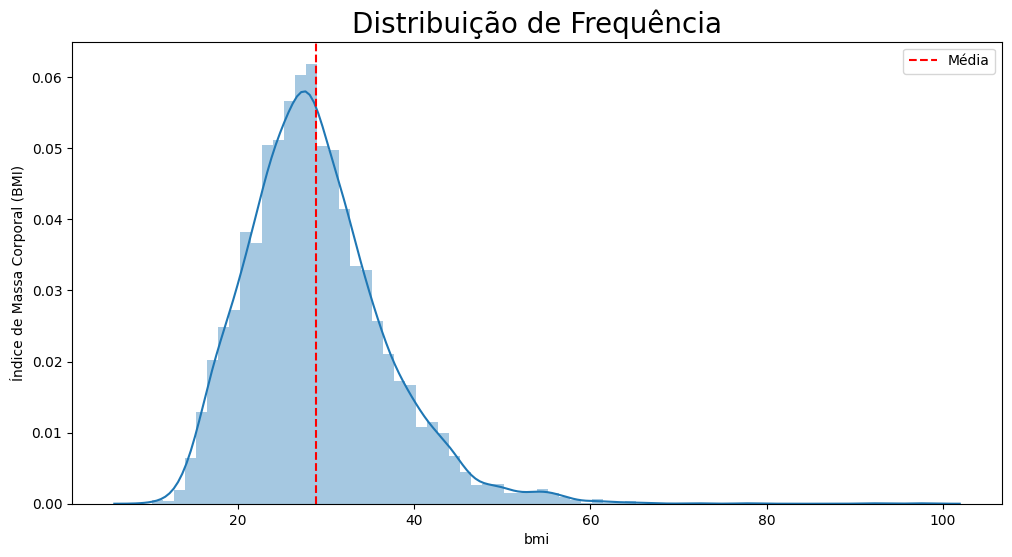

In [23]:
# Vamos verificar a distribuição da variável

ax = sns.distplot(df['bmi'], bins=70)

# Configurando tamanho da figura

ax.figure.set_size_inches(12, 6)

# Adicionar o título do gráfico

ax.set_title('Distribuição de Frequência', fontsize=20)

# Adicionar o nome na eixo Y

ax.set_ylabel('Índice de Massa Corporal (BMI)')

# Cálculo da média

media = df['bmi'].mean()

# Plotar a linha

ax.axvline(media, color= 'red', linestyle= '--', label= 'Média')

# Adicionar legenda

ax.legend()

plt.show()

Com base no gráfico, irei substituir os dados faltantes pela média

In [24]:
# Substituindo os valores ausentes pela média

df['bmi'].replace(np.NaN, df['bmi'].mean(), inplace= True)

In [25]:
# Verificar a quantidade de dados nulos

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [26]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [27]:
# Identificar valores duplicados

# Selecione todas as linhas duplicadas com base em todas as colunas

df[df.duplicated(keep=False)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [28]:
# Selecione todas as linhas duplicadas com base na coluna selecionada

df[df.duplicated(subset=['id'],keep=False)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Vamos remover uma coluna chamada 'id' de um DataFrame 'df', pois não é necessário para analise.

Vou explicar os diferentes componentes do código:

* 'df' é o nome do DataFrame em que a operação será realizada.

* 'drop' é uma função que remove elementos de um DataFrame. Nesse caso, está sendo utilizada para remover uma coluna específica.

* ['id'] é uma lista que contém o nome da coluna que será removida. No caso, a coluna chamada 'id' será excluída.

* 'axis=1' indica que a operação deve ser realizada ao longo do eixo das colunas. Isso significa que a função 'drop' irá remover a coluna especificada em cada linha do DataFrame.

* 'inplace=True' indica que a operação deve ser realizada diretamente no DataFrame 'df', ou seja, o DataFrame será modificado permanentemente. Se 'inplace=False' (ou omitido), uma cópia modificada do DataFrame seria retornada, e o DataFrame original não seria alterado.

Portanto, o código remove a coluna 'id' do DataFrame 'df' de forma permanente.

In [29]:
df.drop(['id'], axis = 1, inplace = True)

In [30]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [31]:
# Verificar mais informações após apagar a coluna

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [32]:
# Verificar a quantidade de valores único por coluna

df.nunique()

gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   419
smoking_status          4
stroke                  2
dtype: int64

# Analisar as variáveis

In [33]:
# Loop sobre cada coluna no DataFrame onde dtype é object

for col in df.select_dtypes(include=['object']).columns:

    # Imprimir o nome das colunas e os valores exclusivos

    print(f'Os valores únicos para {col}: {df[col].unique()}')

Os valores únicos para gender: ['Male' 'Female' 'Other']
Os valores únicos para ever_married: ['Yes' 'No']
Os valores únicos para work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Os valores únicos para Residence_type: ['Urban' 'Rural']
Os valores únicos para smoking_status: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']


In [34]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Explicação dos diferentes componentes do código:

* plt.figure(figsize=(15, 6)) cria uma nova figura do Matplotlib com uma largura de 15 unidades e altura de 6 unidades. Isso define o tamanho da figura do gráfico que será exibido.

* sns.countplot(data=df, x='gender', palette='hls') cria o gráfico de contagem. Ele usa a função countplot do Seaborn para contar e exibir o número de ocorrências para cada categoria da coluna 'gender' do DataFrame 'df'. 
* O parâmetro data=df especifica que o DataFrame 'df' contém os dados a serem usados. 
* O parâmetro x='gender' define que a coluna 'gender' será exibida no eixo x (horizontal). 
* O parâmetro palette='hls' define a paleta de cores a ser usada no gráfico.

* plt.xticks(rotation=90) gira os rótulos dos ticks (marcas) do eixo x em 90 graus. Isso é útil quando os rótulos são longos ou quando há muitas categorias no eixo x, permitindo uma melhor legibilidade dos rótulos.

* plt.show() exibe o gráfico na saída.

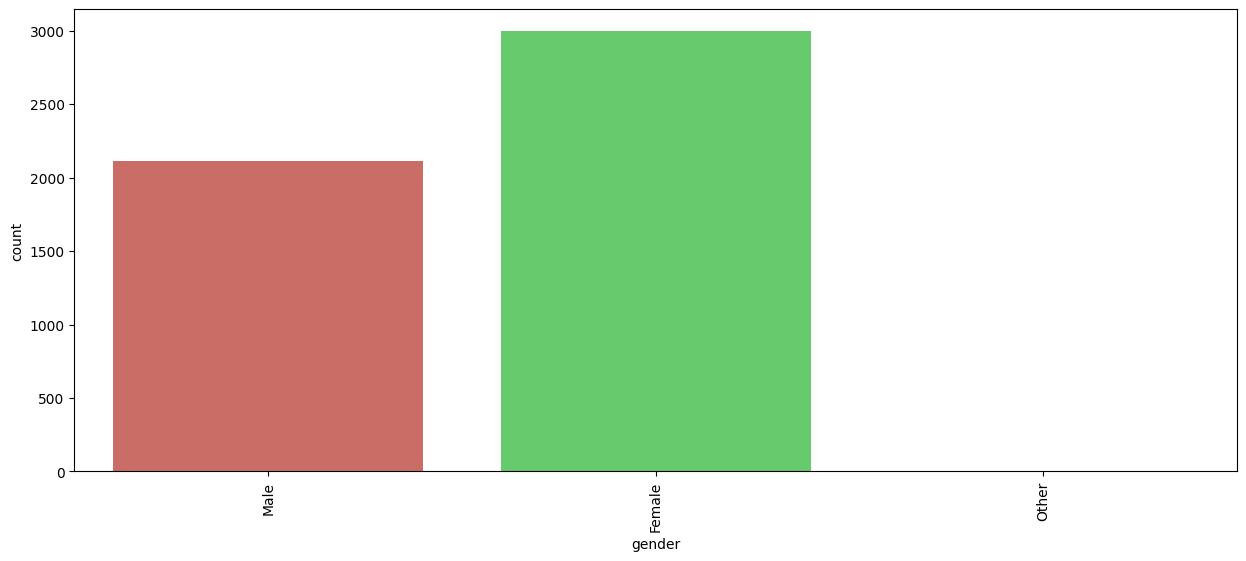

In [35]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'gender',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

Observação: A categoria 'outros' tem apenas uma entrada que é muito insignificante, e por isso deve ser adicionada à categoria 'masculino', pois tem entradas menores do que a categoria 'feminino'; isso ajudará a melhorar a propagação.

In [36]:
# Adicionando os dados da categória outros em masculino

df['gender'] = df['gender'].replace('Other', 'Male')

In [37]:
df['gender'].value_counts()

gender
Female    2994
Male      2116
Name: count, dtype: int64

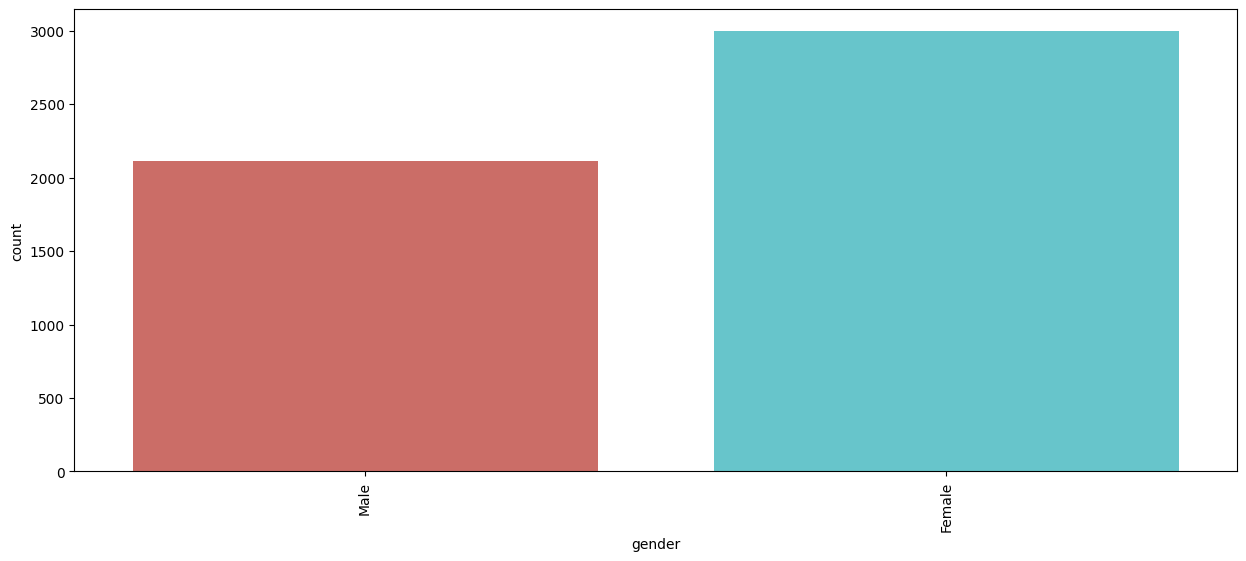

In [38]:
plt.figure(figsize=(15, 6))
sns.countplot(data= df,
              x= 'gender',
              palette= 'hls')
plt.xticks(rotation= 90)
plt.show()

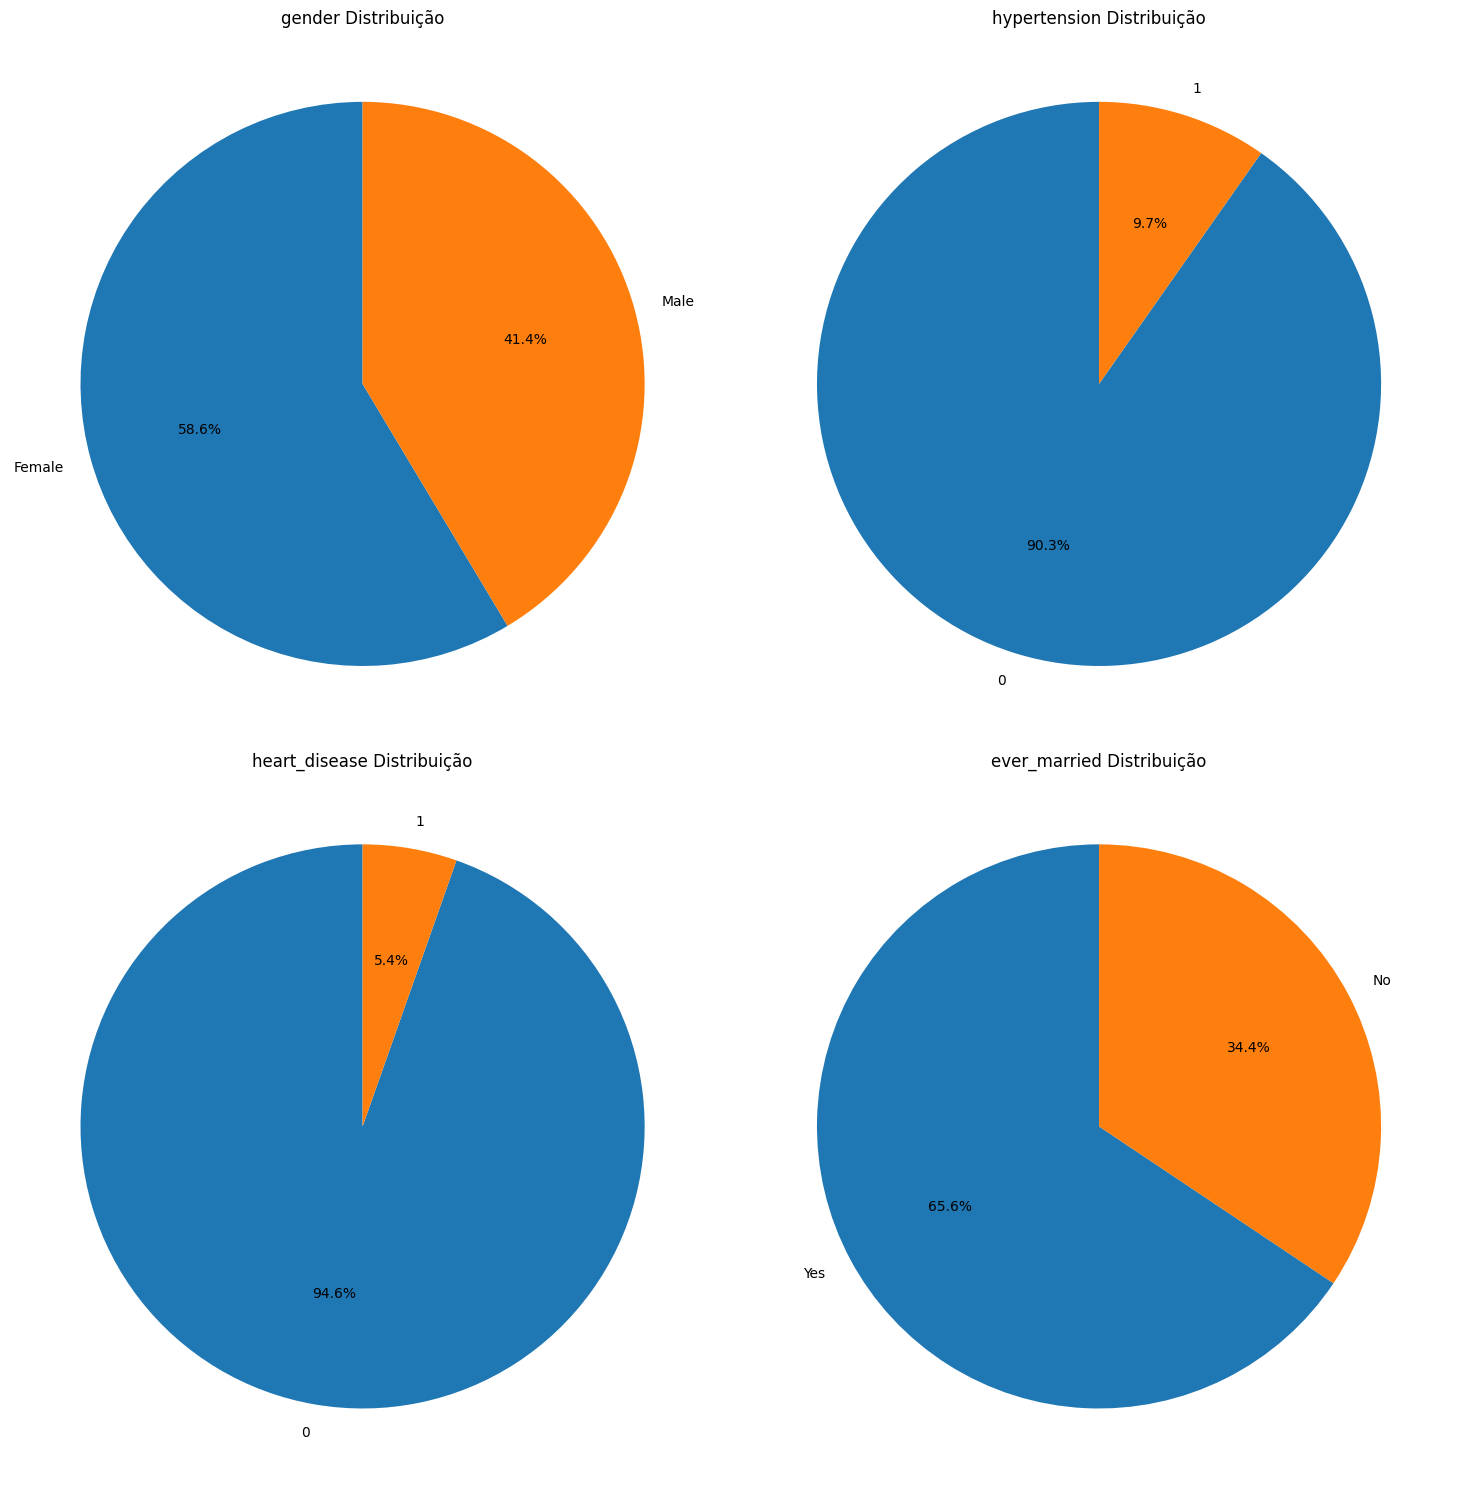

In [39]:
# Criando a figura e axes

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 15))

# Criando o gráfico de pizza para variável categoricas qualitativas

for i, var in enumerate(var_qualitativas):
    if i < len(axs.flat):

        # Contar o número de ocorrências para cada categoria

        cat_counts = df[var].value_counts()

        # Criando o gráfico

        axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

        # Criando o título

        axs.flat[i].set_title(f'{var} Distribuição')

# Ajuste do espaçamento entre subclasse

fig.tight_layout()

# Mostrar o gráficos

plt.show()


In [40]:
var_quantitativas

['age', 'avg_glucose_level', 'bmi']

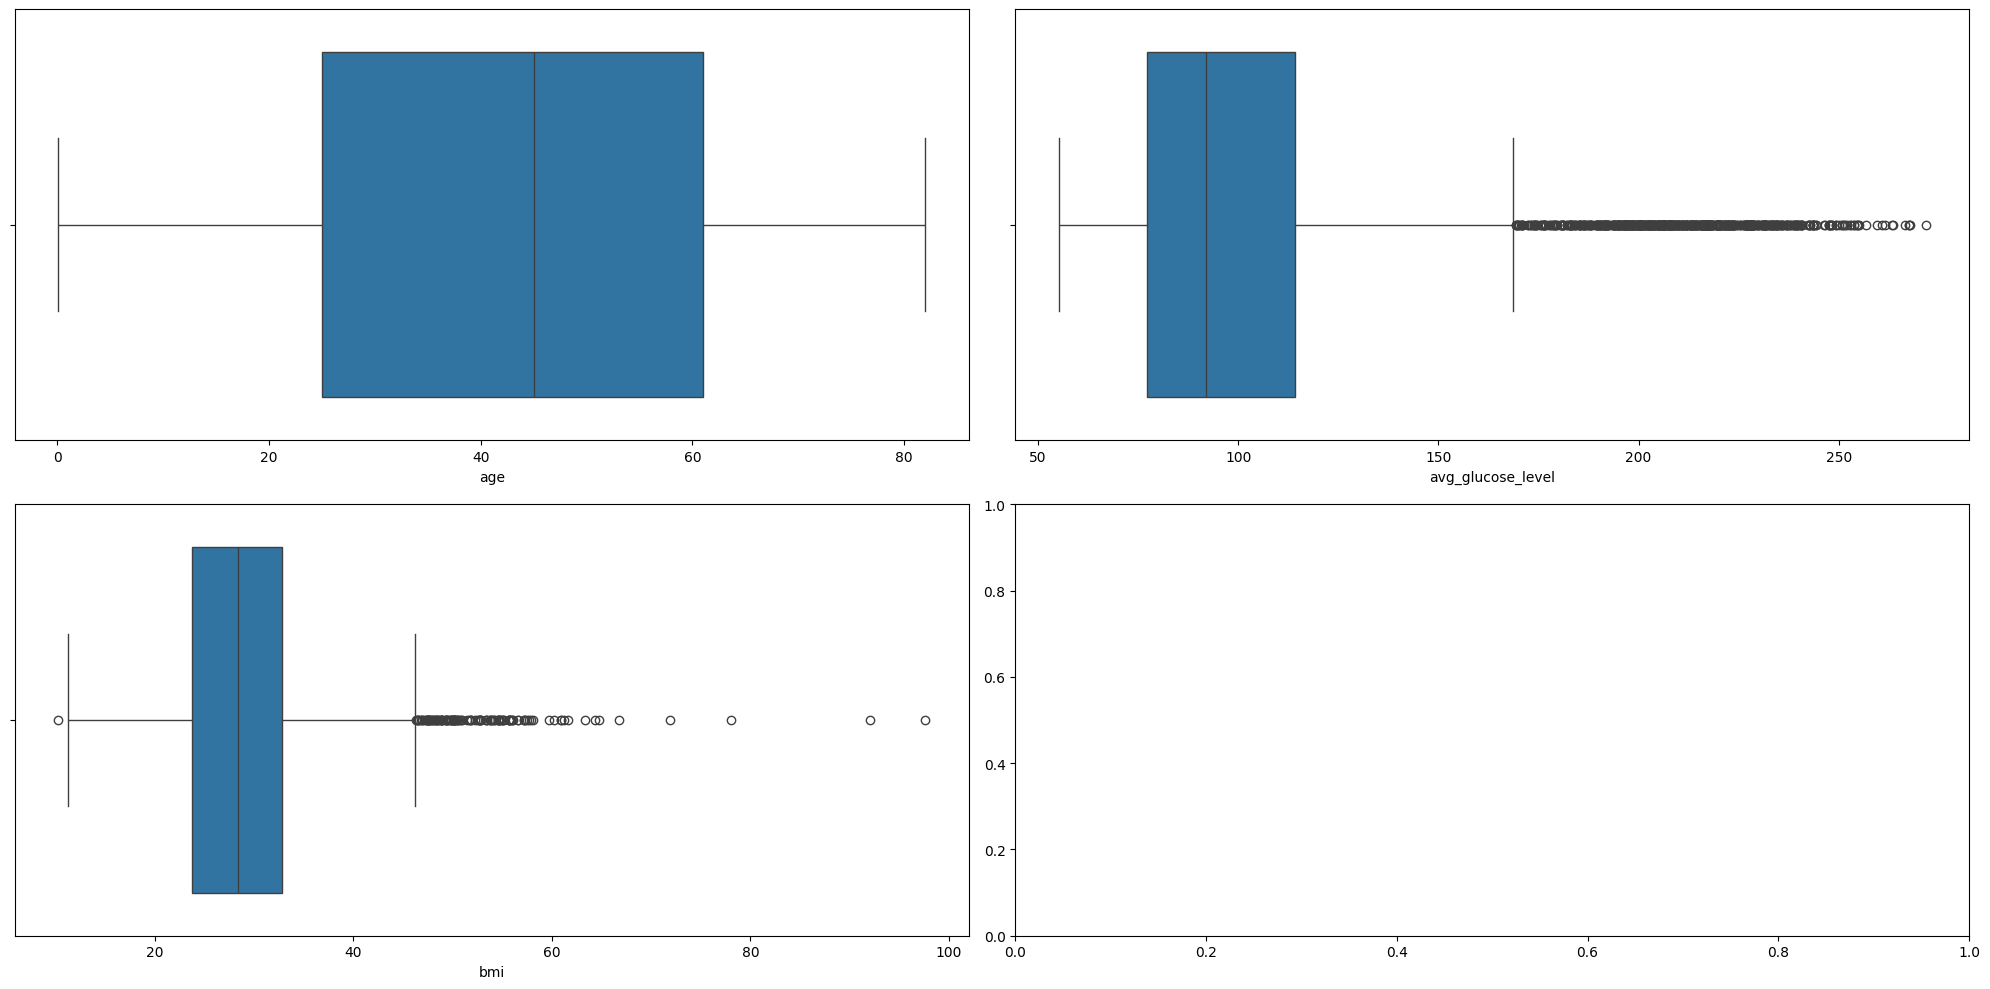

In [41]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(var_quantitativas):
    sns.boxplot(x= var, data= df, ax= axs[i])

fig.tight_layout()

plt.show()

Obs: Tem outliers nas colunas avg_glucose_level e bmi

In [42]:
df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [43]:
df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

Exibindo um boxplot para uma variável quantitativa em relação à coluna 'stroke' do DataFrame df. 

Isso permite visualizar a distribuição das variáveis quantitativas com base na presença ou ausência de um acidente vascular cerebral (AVC) representado pela coluna 'stroke'.

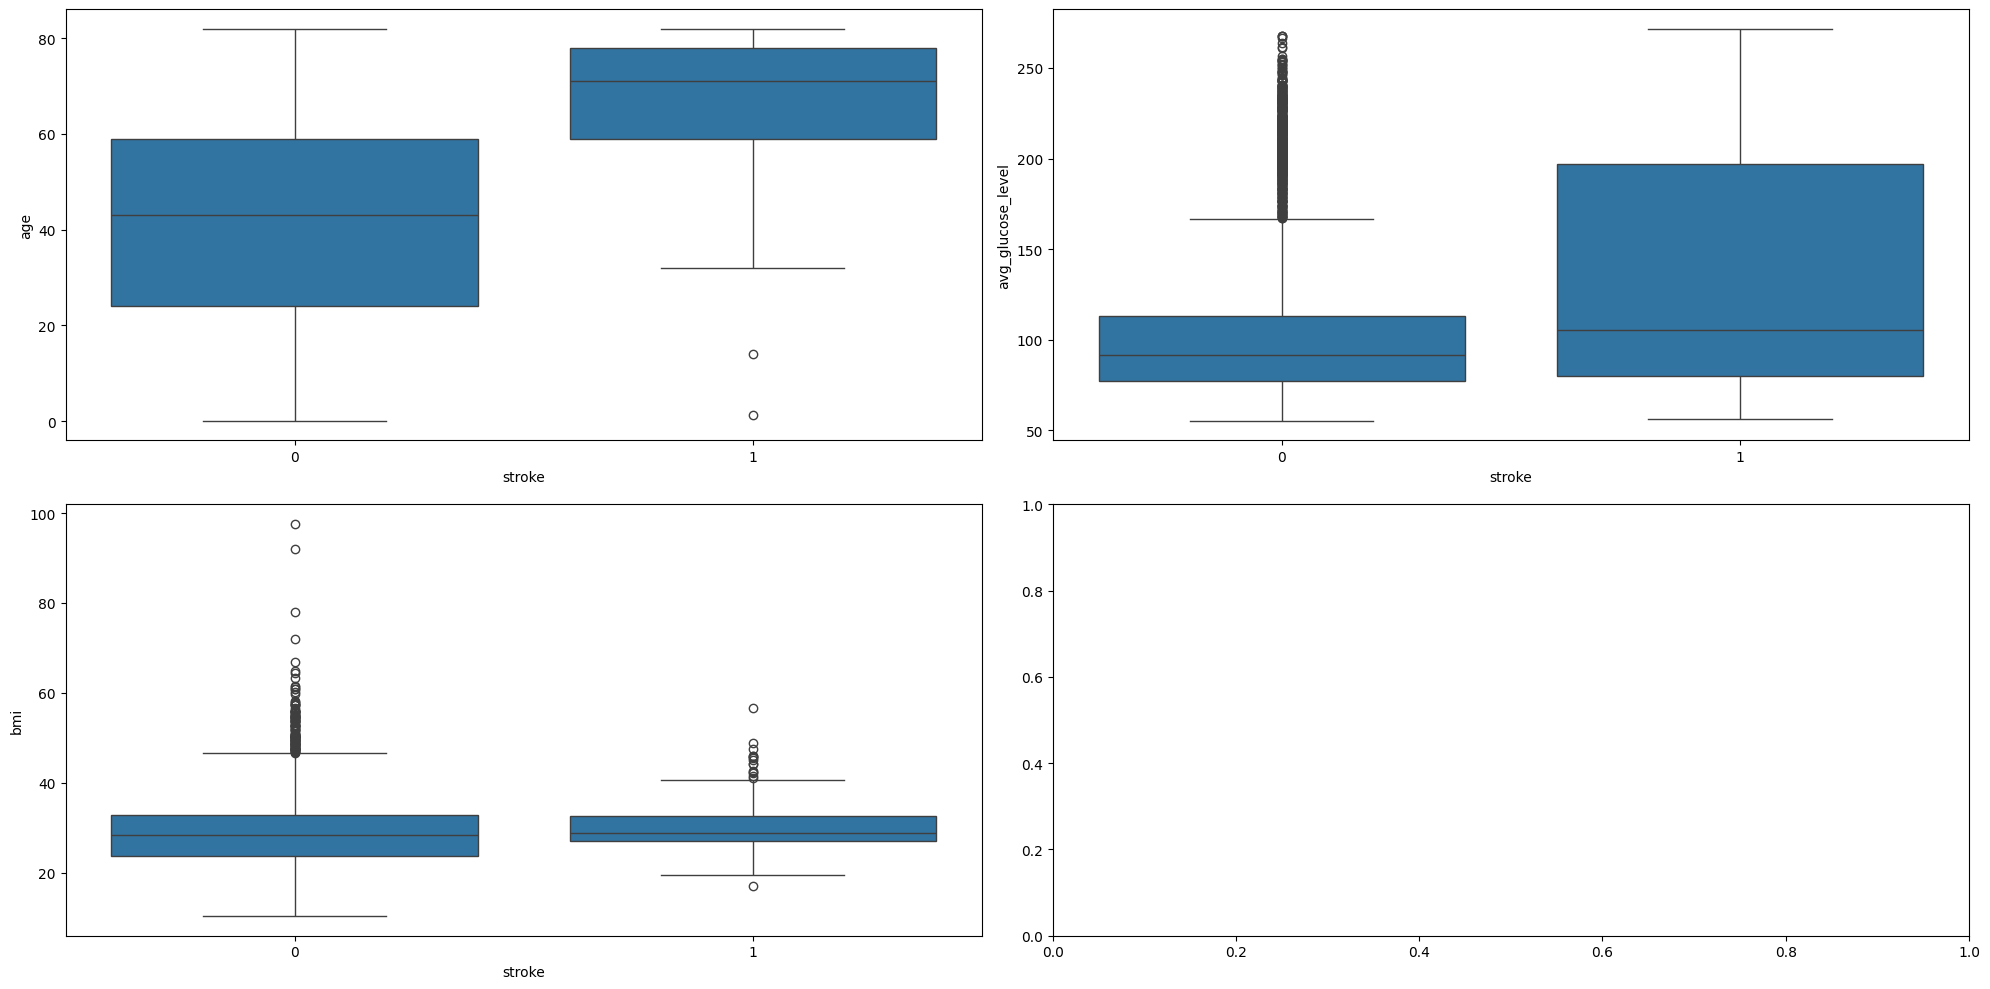

In [44]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(var_quantitativas):
    sns.boxplot(y= var, x= df['stroke'], data= df, ax= axs[i])

fig.tight_layout()

plt.show()

Vamos manter os outliers, pois é possível ter avg_glucose acima de 125mg/dl e bmi acima de 30kg, como observado nos casos de diabéticos e obesos, respectivamente.

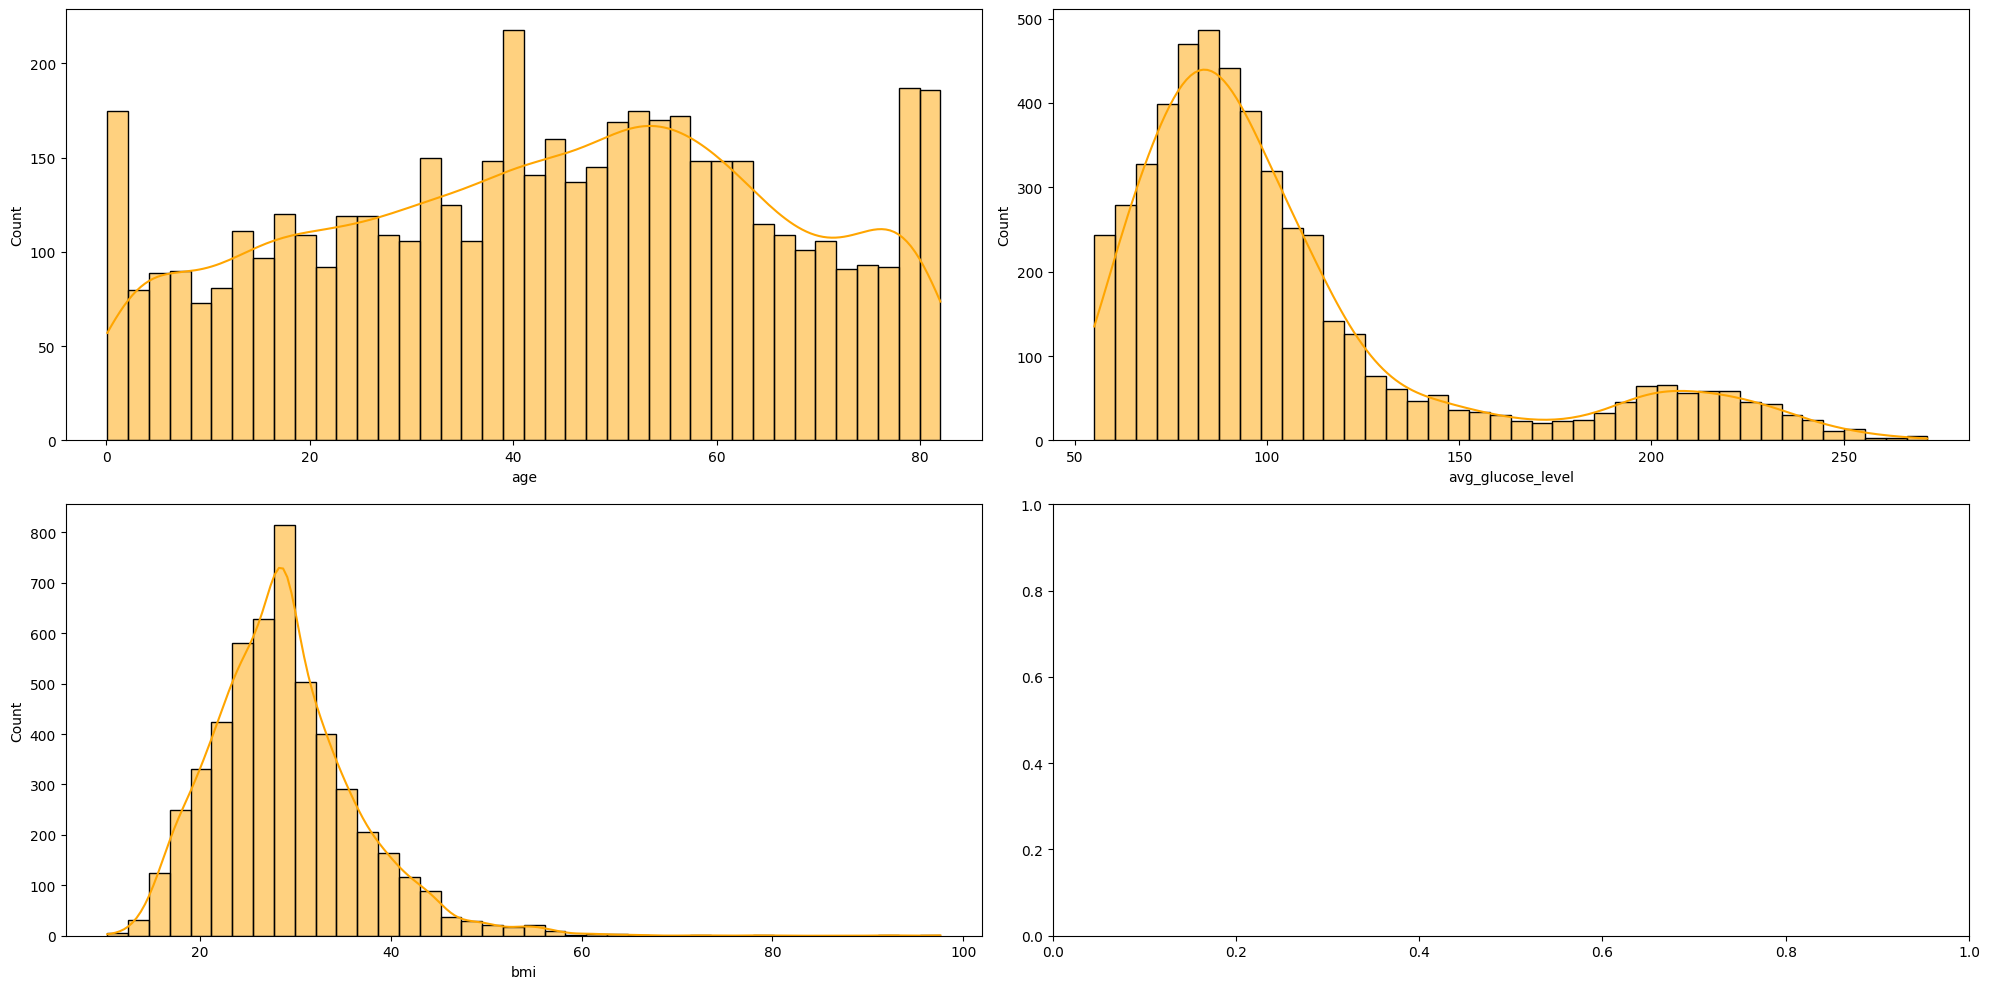

In [45]:
fig, axs = plt.subplots(nrows= 2, ncols= 2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(var_quantitativas):
    sns.histplot(x= var, data= df, ax= axs[i], bins= 40, kde= True, palette= 'husl', color='orange')

fig.tight_layout()

plt.show()

Seaborn Line Plots descreve a relação entre valores contínuos e categóricos em um formato de ponto de dados contínuo.

É uma visualização de dados relacionais que mostra como uma variável contínua muda quando outra muda.

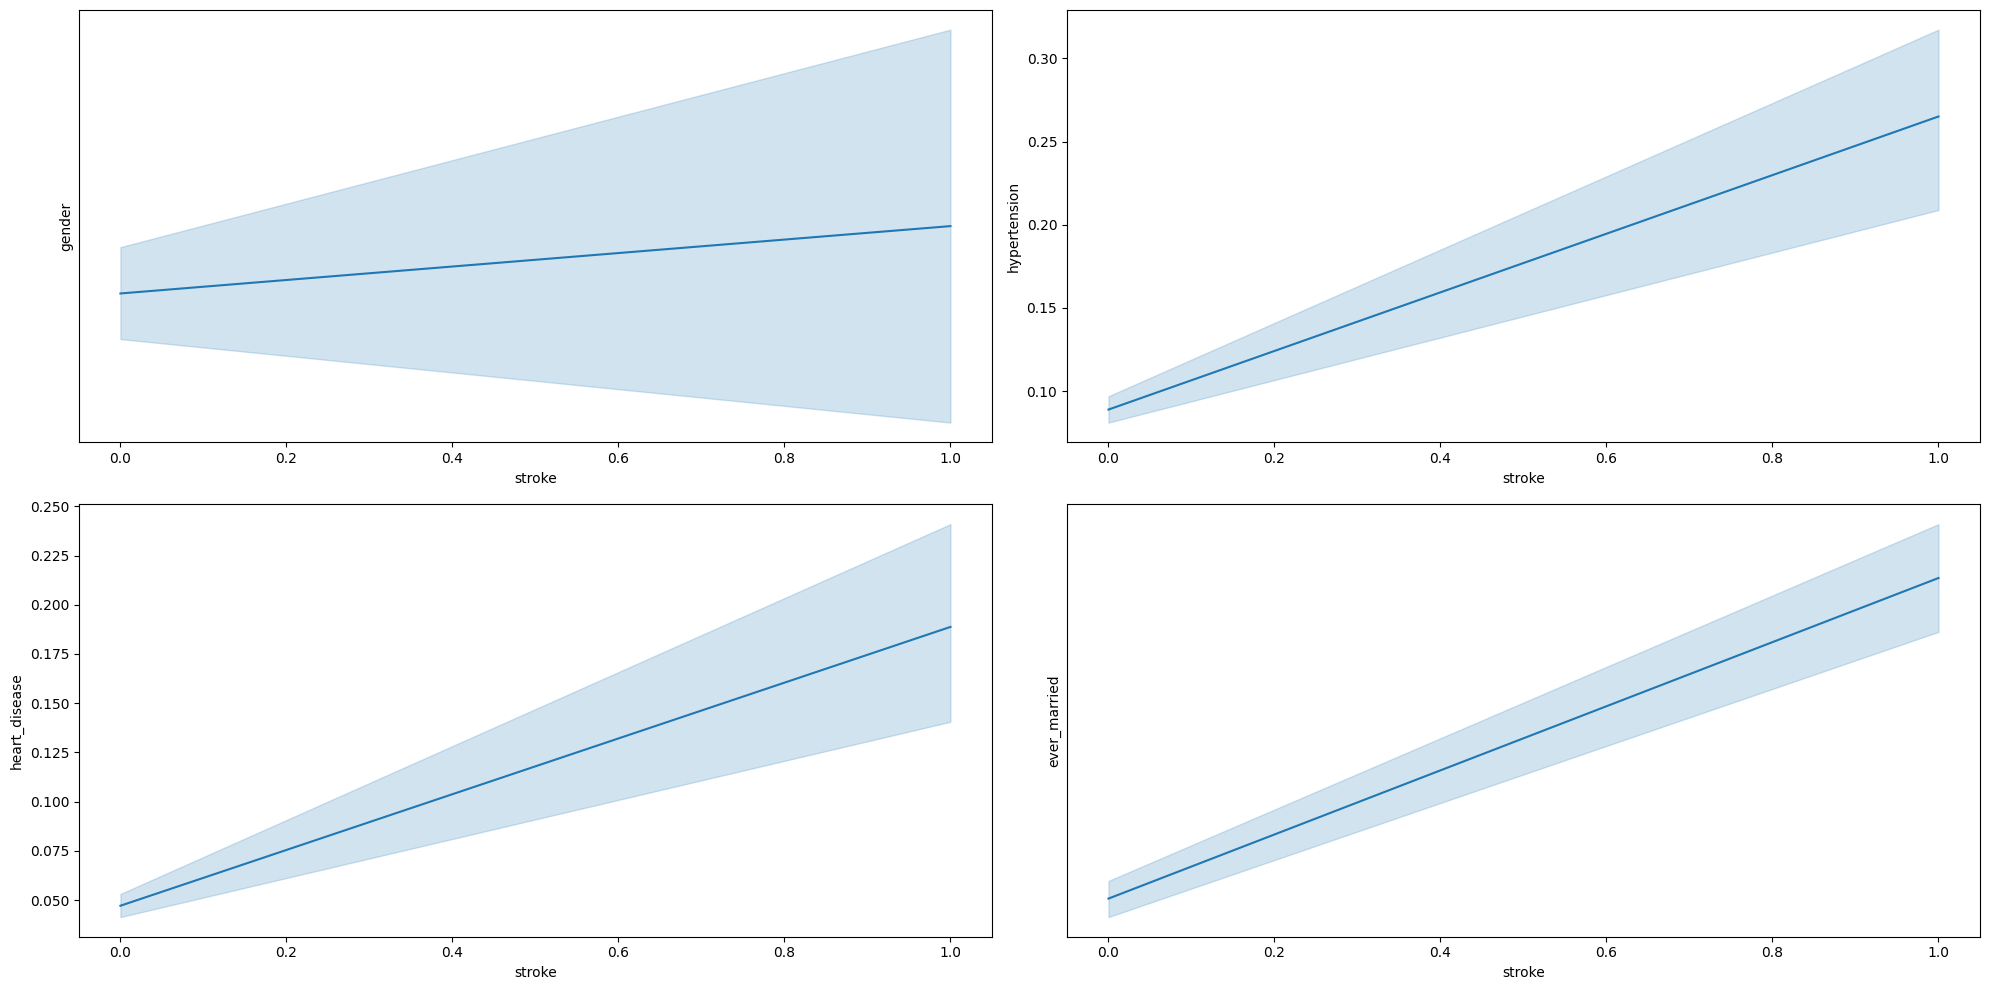

In [46]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(var_qualitativas):
    if i < len(axs):
        sns.lineplot(x= df['stroke'], y=var, data=df, palette='husl', ax=axs[i])

fig.tight_layout()
plt.show()


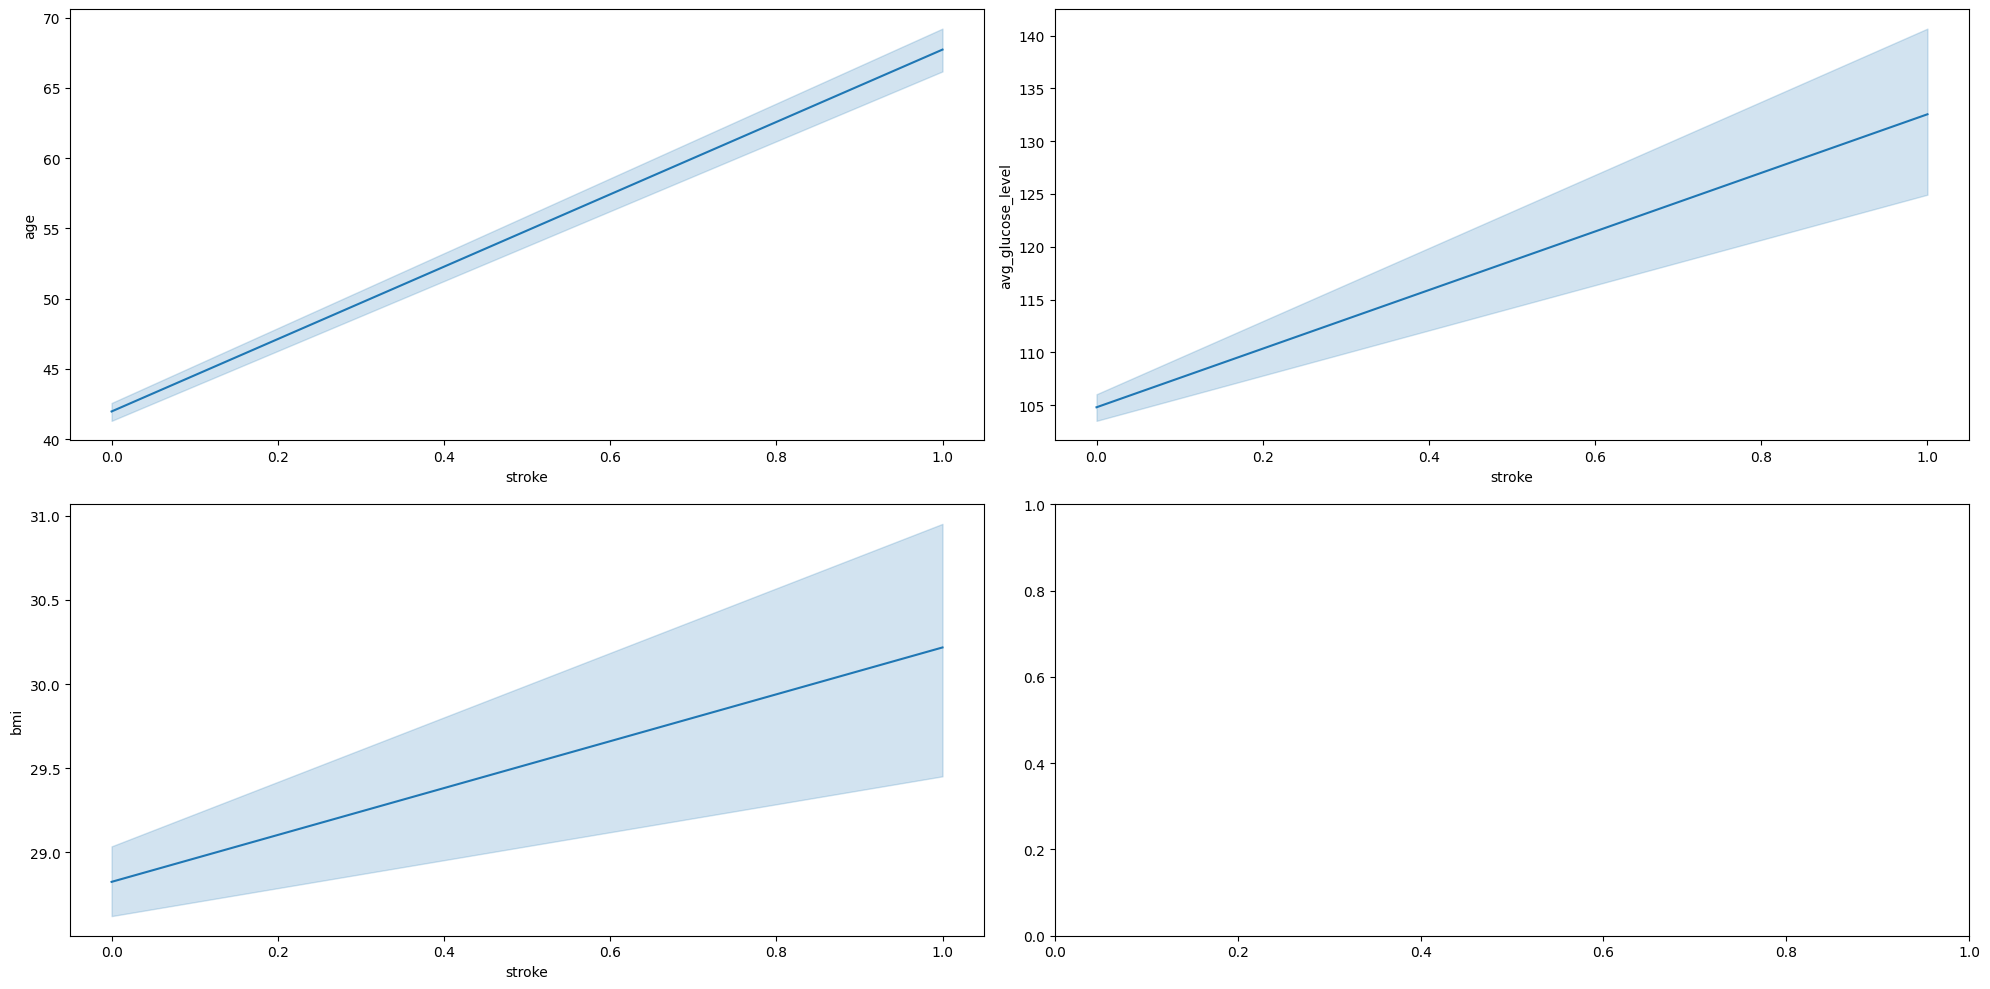

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(var_quantitativas):
    if i < len(axs):
        sns.lineplot(x= df['stroke'], y=var, data=df, palette='husl', ax=axs[i])

fig.tight_layout()
plt.show()

In [48]:
# Verificar as colunas com variável numéricas

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


Utilizando Correlação

Quadro de dados. corr ( método = 'pearson' , min_periods = 1 , numeric_only = False )

Calcule a correlação emparelhada de colunas, excluindo valores NA/nulos.

**Parâmetros método {'pearson', 'kendall', 'spearman'} ou callable**

Método de correlação:

* Pearson: coeficiente de correlação padrão

* kendall : Coeficiente de correlação Kendall Tau

* spearman: correlação de classificação de lanceiro

* callable: callable com entrada de dois ndarrays 1d e retornando um float. Observe que a matriz retornada de corr terá 1 ao longo das diagonais e será simétrica independentemente do comportamento do callable.

**min_periods int, opcional**

Número mínimo de observações necessárias por par de colunas para obter um resultado válido. Atualmente disponível apenas para correlação de Pearson e Spearman.

**numeric_only bool, padrão Falso**

Inclua apenas float , int ou dados booleanos .

Explicando os diferentes componentes do código:

plt.figure(figsize=(15,6)) cria uma nova figura do Matplotlib com uma largura de 15 unidades e altura de 6 unidades. Isso define o tamanho da figura do gráfico que será exibido.

matrix = np.triu(df_corr) cria uma matriz triangular superior a partir da matriz de correlação df_corr. A função np.triu do NumPy retorna uma matriz com todos os elementos abaixo da diagonal principal (inclusive) definidos como zero, preservando apenas os elementos da diagonal principal e acima dela.

sns.heatmap(df_corr, annot=True, linewidth=.8, mask=matrix, cmap='crest') cria o mapa de calor. Ele usa a função heatmap do Seaborn para exibir as correlações entre as colunas do DataFrame df_corr. O parâmetro df_corr especifica a matriz de correlação a ser utilizada. O parâmetro annot=True adiciona os valores das correlações nos quadrados do mapa de calor. O parâmetro linewidth=.8 define a largura das linhas que separam os quadrados do mapa de calor. O parâmetro mask=matrix oculta os quadrados abaixo da diagonal principal, conforme definido na matriz triangular superior criada anteriormente. O parâmetro cmap='crest' define a paleta de cores a ser utilizada no mapa de calor.

plt.show() exibe o mapa de calor na saída.

In [49]:
# Verificar a correlação entre as colunas numéricas

correlacao = df.select_dtypes('number').corr()
correlacao

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.325942,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.160189,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.038899,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.168751,0.131945
bmi,0.325942,0.160189,0.038899,0.168751,1.000000,0.038947
stroke,0.245257,0.127904,0.134914,0.131945,0.038947,1.000000


<Axes: >

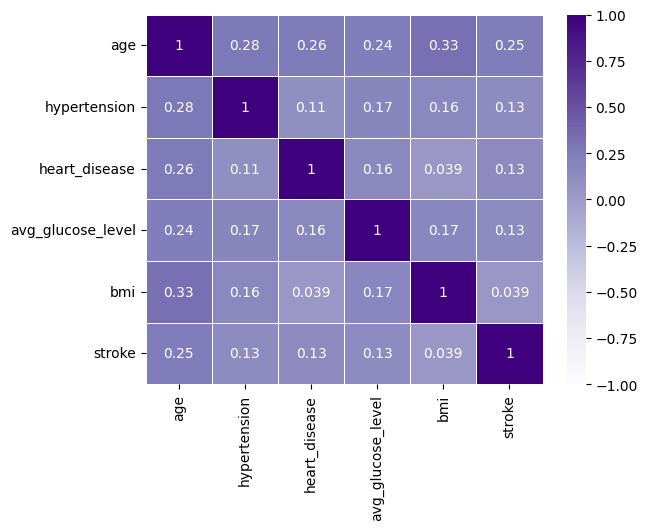

In [50]:
# Visualizando a correlação

sns.heatmap(correlacao, annot=True, vmin= -1, vmax= 1, cmap='Purples', linewidth= 0.5)

## Engenharia de recursos

Vamos reduzir o número de grupos das variáveis ​​categóricas contínuas (idade, IMC, avg_glucose_level)

In [51]:
# Verificando o variável

df['age'].describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

In [52]:
print(f'O valor máximo é: {df["age"].max()}')
print(f'O valor mínimo é: {df["age"].min()}')
print(f'A quantidade única de variável é: {df["age"].nunique()}')

O valor máximo é: 82.0
O valor mínimo é: 0.08
A quantidade única de variável é: 104


In [53]:
# Criando categorias de faixa etária

idade = [0, 13, 18, 45, 60, 100]
grupo_nomes = ['Crianças', 'Adolescentes', 'Adultos', 'Meia-idade', 'Idosos']
df['age_group'] = pd.cut(df['age'], bins= idade, labels= grupo_nomes)
df['age_group'].unique()

['Idosos', 'Meia-idade', 'Adultos', 'Crianças', 'Adolescentes']
Categories (5, object): ['Crianças' < 'Adolescentes' < 'Adultos' < 'Meia-idade' < 'Idosos']

In [54]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Idosos
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Idosos
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Idosos
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Meia-idade
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Idosos


In [55]:
# Verificando o variável

df['bmi'].describe()

count    5110.000000
mean       28.893237
std         7.698018
min        10.300000
25%        23.800000
50%        28.400000
75%        32.800000
max        97.600000
Name: bmi, dtype: float64

In [56]:
print(f'O valor máximo é: {df["bmi"].max()}')
print(f'O valor mínimo é: {df["bmi"].min()}')
print(f'A quantidade única de variável é: {df["bmi"].nunique()}')

O valor máximo é: 97.6
O valor mínimo é: 10.3
A quantidade única de variável é: 419


In [57]:
# Criando agrupamento de IMC

ranges = [0, 19, 25, 30, 100]
grupo_nomes = ['Abaixo do peso', 'Normal', 'Excesso de peso', 'Obesidade']
df['bmi_group'] = pd.cut(df['bmi'], bins= ranges, labels= grupo_nomes)
df['bmi_group'].unique()

['Obesidade', 'Excesso de peso', 'Normal', 'Abaixo do peso']
Categories (4, object): ['Abaixo do peso' < 'Normal' < 'Excesso de peso' < 'Obesidade']

In [58]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Idosos,Obesidade
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Idosos,Excesso de peso
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Idosos,Obesidade
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Meia-idade,Obesidade
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Idosos,Normal


In [59]:
# Verificando o variável

df['avg_glucose_level'].describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

In [60]:
print(f'O valor máximo é: {df["avg_glucose_level"].max()}')
print(f'O valor mínimo é: {df["avg_glucose_level"].min()}')
print(f'A quantidade única de variável é: {df["avg_glucose_level"].nunique()}')

O valor máximo é: 271.74
O valor mínimo é: 55.12
A quantidade única de variável é: 3979


In [61]:
# Criando agrupamento de glicose

ranges = [0, 70, 99, 125, 280]
grupo_nomes = ['Baixo', 'Normal', 'Alto', 'Muito_alto']
df['glucose_level_group'] = pd.cut(df['avg_glucose_level'], bins= ranges, labels= grupo_nomes)
df['glucose_level_group'].unique()

['Muito_alto', 'Alto', 'Normal', 'Baixo']
Categories (4, object): ['Baixo' < 'Normal' < 'Alto' < 'Muito_alto']

In [62]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,glucose_level_group
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,Idosos,Obesidade,Muito_alto
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,Idosos,Excesso de peso,Muito_alto
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,Idosos,Obesidade,Alto
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,Meia-idade,Obesidade,Muito_alto
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,Idosos,Normal,Muito_alto


### Análise Exploratória dos Dados Categorizados 

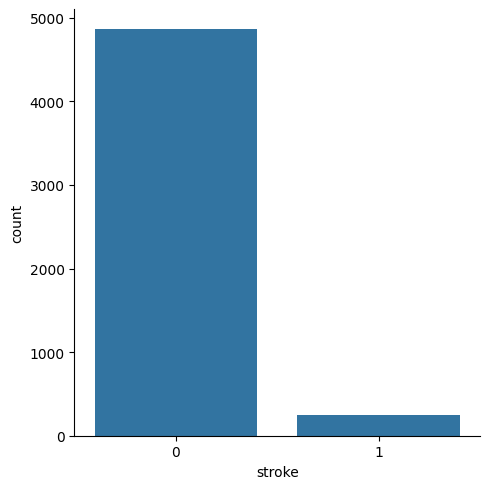

In [63]:
sns.catplot(data= df, x= 'stroke', kind= 'count')
sns.set_style('white')
plt.show()

Obs: Podemos ver claramente que nossos dados não estão balanceados. Corrigiremos o desequilíbrio enquanto construímos nosso modelo equilibrando os pesos das classes.

Relação entre age e stroke

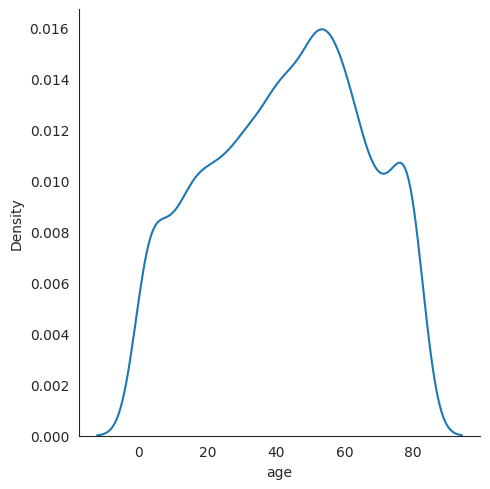

In [64]:
# Visualizar a relação entre idade e avc

stroke = df[df['stroke'] == 1]
sns.displot(df['age'], kind= 'kde')
sns.set_style('darkgrid')
plt.show()

Para tornar a tendência de relacionamento mais clara, vamos visualizá-la em age_group

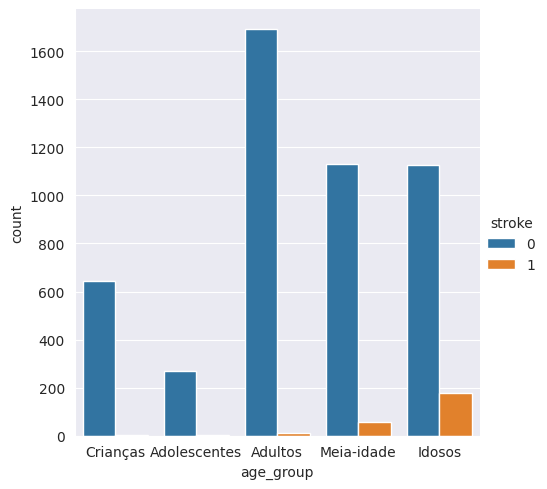

In [65]:
sns.catplot(data=df, x= 'age_group', hue= 'stroke', kind= 'count')
sns.set_style('white')
plt.show()

Obs: O risco de AVC parece aumentar com o aumento da idade.

Relação entre bmi e stroke

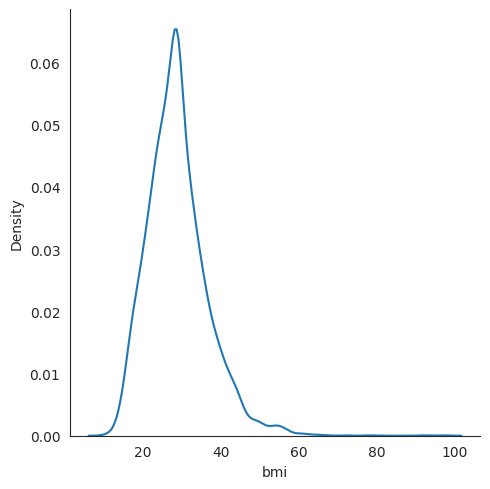

In [66]:
# Visualizar a relação entre índice de massa corporal e avc

stroke = df[df['stroke'] == 1]
sns.displot(df['bmi'], kind= 'kde')
sns.set_style('darkgrid')
plt.show()

Para tornar a tendência de relacionamento mais clara, vamos visualizá-la em bmi_group

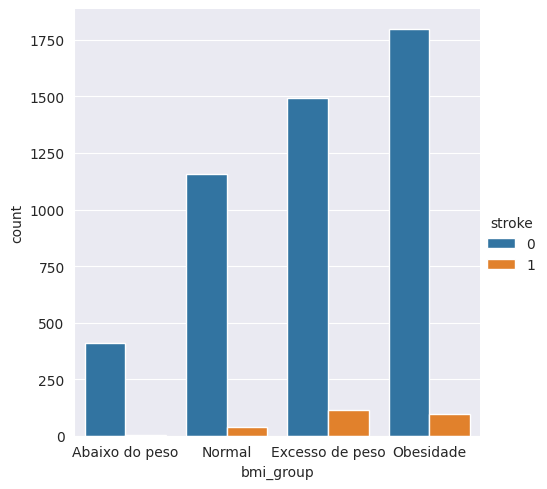

In [67]:
sns.catplot(data=df, x= 'bmi_group', hue= 'stroke', kind= 'count')
sns.set_style('white')
plt.show()

Obs: o IMC parece ser diretamente proporcional ao risco de AVC, embora bastante, já que o nível de risco atingiu um pico no grupo com sobrepeso e caiu ligeiramente no grupo com obesidade. Isso pode ser devido a outros fatores que influenciam nossos dados.

Relação entre bmavg_glucose_level e stroke

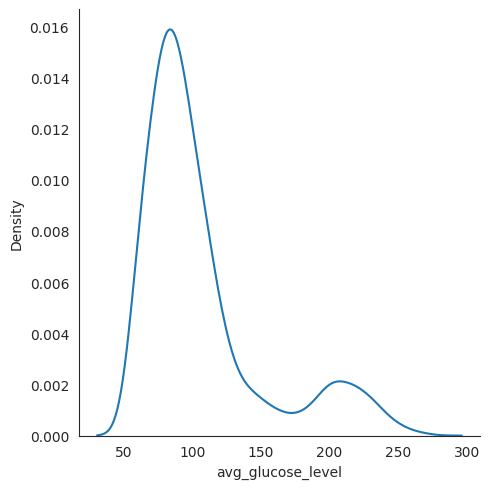

In [68]:
# Visualizar a relação entre índice de glicose e avc

stroke = df[df['stroke'] == 1]
sns.displot(df['avg_glucose_level'], kind= 'kde')
sns.set_style('darkgrid')
plt.show()

Para tornar a tendência de relacionamento mais clara, vamos visualizá-la em glucose_level_group

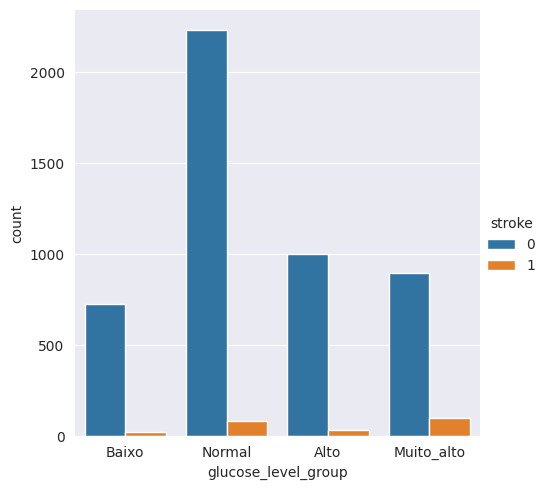

In [69]:
sns.catplot(data=df, x= 'glucose_level_group', hue= 'stroke', kind= 'count')
sns.set_style('white')
plt.show()

Obs: a relação entre avg_glucose_level e stroke parece ser desigual

Vamos ver se idade, IMC, avg_glucose_level têm algum tipo de relação entre si:

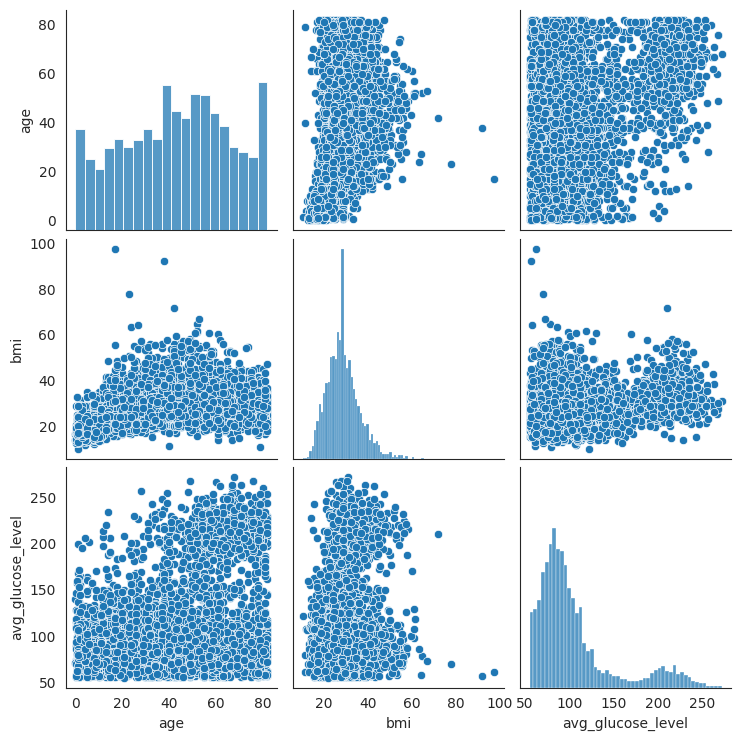

In [70]:
colunas= ['age', 'bmi', 'avg_glucose_level']
sns.pairplot(df[colunas])
plt.show()

Obs: Parece que não há nenhuma relação digna de nota entre essas colunas

# Pré-Processamento de dados

O pré-processamento de dados é uma das principais etapas da análise de dados e do aprendizado de máquina. O pré-processamento eficaz de dados é crucial para obter o maior número possível de insights e também pode nos ajudar a obter maior precisão com modelos de ML.

1. Codificação de dados
Alguns dos métodos de codificação de dados amplamente usados ​​são Label Encoding e One Hot Encoding .

a) Codificação de rótulo

A codificação de rótulos é basicamente uma forma de codificar variáveis ​​categóricas em variáveis ​​numéricas. Por exemplo, vamos considerar uma cesta que contém frutas.

cesta = ['maçã', 'laranja', 'uva', 'morango', 'melão', 'ameixa', 'banana', 'melão', 'ameixa', 'ameixa', 'uva', 'melancia' , 'melão', 'laranja']

São oito frutas únicas — maçã, laranja, uva, morango, melão, ameixa, banana e melancia, e algumas delas estão contidas mais de uma vez na cesta. Agora vamos tentar converter esses dados categóricos em forma numérica usando a função skleran.preprocessing.LabelEncoder .

from sklearn.preprocessing importar LabelEncoder
encoder = LabelEncoder () 

labels = encoder.fit_transform(cesta) 

print(labels) #[0 4 2 6 3 5 1 3 5 5 2 7 3 4]

Usando LabelEncoder, podemos ver que as variáveis ​​categóricas, frutas, são convertidas em variáveis ​​numéricas.

Para entender qual número representa qual fruta, podemos usar a operação .classes_ da seguinte forma:

<img alt="" class="bg of og c" width="313" height="199" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:313/1*FNBqCP8wtY9nVayMQH0SRg.png">

Também podemos converter os rótulos numéricos de volta aos valores categóricos originais usando a função inverse_transform().

<img alt="" class="bg of og c" width="613" height="151" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:613/1*sgWre0pSKppzfq0Ox5Bz-A.png">

O código acima importa a classe LabelEncoder do módulo preprocessing da biblioteca scikit-learn (sklearn) e aplica a codificação de rótulos (label encoding) em colunas específicas do DataFrame 'df'.

Vou explicar os diferentes componentes do código:

* from sklearn.preprocessing import LabelEncoder importa a classe 
* LabelEncoder do módulo preprocessing da biblioteca scikit-learn. O LabelEncoder é usado para transformar rótulos categóricos em valores numéricos.

* label_encoder = LabelEncoder() cria uma instância do LabelEncoder.

* df.gender = label_encoder.fit_transform(df.gender) aplica a codificação de rótulos na coluna 'gender' do DataFrame 'df'. 

* A função fit_transform ajusta o codificador aos valores únicos da coluna 'gender' e, em seguida, transforma esses valores em valores numéricos.

In [71]:
# Verificar informações dos tipos de dados

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   gender               5110 non-null   object  
 1   age                  5110 non-null   float64 
 2   hypertension         5110 non-null   int64   
 3   heart_disease        5110 non-null   int64   
 4   ever_married         5110 non-null   object  
 5   work_type            5110 non-null   object  
 6   Residence_type       5110 non-null   object  
 7   avg_glucose_level    5110 non-null   float64 
 8   bmi                  5110 non-null   float64 
 9   smoking_status       5110 non-null   object  
 10  stroke               5110 non-null   int64   
 11  age_group            5110 non-null   category
 12  bmi_group            5110 non-null   category
 13  glucose_level_group  5110 non-null   category
dtypes: category(3), float64(3), int64(3), object(5)
memory usage: 454.8+ KB


In [72]:
from sklearn import preprocessing

# Loop sobre cada coluna no DataFrame onde dtype é object

for col in df.select_dtypes(include=['object']).columns:
   
    # Iniciando o LabelEncoder

    label_encoder = preprocessing.LabelEncoder()

    # Ajustar o codificador aos valores únicos na coluna

    label_encoder.fit(df[col].unique())

    # Transformando a coluna usando o encoder

    df[col] = label_encoder.transform(df[col])

    # Imprimir o nome das colunas e os valores exclusivos encoded

    print(f'{col}: {df[col].unique()}')


gender: [1 0]
ever_married: [1 0]
work_type: [2 3 0 4 1]
Residence_type: [1 0]
smoking_status: [1 2 3 0]


In [73]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,glucose_level_group
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,Idosos,Obesidade,Muito_alto
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,Idosos,Excesso de peso,Muito_alto
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,Idosos,Obesidade,Alto
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,Meia-idade,Obesidade,Muito_alto
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,Idosos,Normal,Muito_alto


In [74]:
# Loop sobre cada coluna no DataFrame onde dtype é category

for col in df.select_dtypes(include=['category']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [75]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,bmi_group,glucose_level_group
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1,3,3,2
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1,3,1,2
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1,3,3,0
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1,4,3,2
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1,3,2,2


A função `pd.get_dummies()` é uma função do pandas (biblioteca de análise de dados em Python) que é usada para converter variáveis categóricas em variáveis dummy (ou variáveis indicadoras). Variáveis dummy são variáveis binárias que representam as diferentes categorias presentes na variável original.

Quando aplicada a uma coluna de um DataFrame contendo variáveis categóricas, a função `pd.get_dummies()` cria novas colunas para cada categoria única na coluna original e atribui um valor de 0 ou 1 para indicar se uma observação pertence a essa categoria ou não.

Aqui está um exemplo para ilustrar seu uso:

```python
import pandas as pd

# Criando um DataFrame de exemplo
data = {'Cor': ['Vermelho', 'Azul', 'Verde', 'Vermelho', 'Amarelo']}
df = pd.DataFrame(data)

# Aplicando pd.get_dummies() na coluna 'Cor'
df_dummies = pd.get_dummies(df['Cor'])

# Exibindo o DataFrame resultante
print(df_dummies)
```

A saída será:

```
   Amarelo  Azul  Verde  Vermelho
0        0     0      0         1
1        0     1      0         0
2        0     0      1         0
3        0     0      0         1
4        1     0      0         0
```

No exemplo acima, a função `pd.get_dummies()` foi aplicada à coluna 'Cor' do DataFrame original. Como resultado, foram criadas novas colunas correspondentes a cada categoria única ('Amarelo', 'Azul', 'Verde' e 'Vermelho') e atribuídos valores binários para indicar a presença ou ausência de cada categoria em cada observação.

Essas variáveis dummy podem ser úteis para análises estatísticas e modelagem de dados, especialmente quando se lida com variáveis categóricas em algoritmos de aprendizado de máquina, onde os modelos geralmente exigem dados numéricos como entrada.

In [76]:
# Colunas com mais de 2 valores exclusivos

df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first= True)

In [77]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,bmi_group,glucose_level_group,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2,smoking_status_3
0,1,67.0,0,1,1,1,228.69,36.600000,1,3,3,2,False,True,False,False,True,False,False
1,0,61.0,0,0,1,0,202.21,28.893237,1,3,1,2,False,False,True,False,False,True,False
2,1,80.0,0,1,1,0,105.92,32.500000,1,3,3,0,False,True,False,False,False,True,False
3,0,49.0,0,0,1,1,171.23,34.400000,1,4,3,2,False,True,False,False,False,False,True
4,0,79.0,1,0,1,0,174.12,24.000000,1,3,2,2,False,False,True,False,False,True,False


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5110 non-null   int64  
 1   age                  5110 non-null   float64
 2   hypertension         5110 non-null   int64  
 3   heart_disease        5110 non-null   int64  
 4   ever_married         5110 non-null   int64  
 5   Residence_type       5110 non-null   int64  
 6   avg_glucose_level    5110 non-null   float64
 7   bmi                  5110 non-null   float64
 8   stroke               5110 non-null   int64  
 9   age_group            5110 non-null   int64  
 10  bmi_group            5110 non-null   int64  
 11  glucose_level_group  5110 non-null   int64  
 12  work_type_1          5110 non-null   bool   
 13  work_type_2          5110 non-null   bool   
 14  work_type_3          5110 non-null   bool   
 15  work_type_4          5110 non-null   b

In [79]:
# Loop sobre cada coluna no DataFrame onde dtype é bool

for col in df.select_dtypes(include=['bool']).columns:
    df[col] = label_encoder.fit_transform(df[col])

In [80]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,age_group,bmi_group,glucose_level_group,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2,smoking_status_3
0,1,67.0,0,1,1,1,228.69,36.600000,1,3,3,2,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,1,3,1,2,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,1,3,3,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,1,4,3,2,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,1,3,2,2,0,0,1,0,0,1,0


Agora, estamos prontos para ir em frente, todas as entradas agora são codificadas com números que facilitarão a compreensão de nossos modelos.

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               5110 non-null   int64  
 1   age                  5110 non-null   float64
 2   hypertension         5110 non-null   int64  
 3   heart_disease        5110 non-null   int64  
 4   ever_married         5110 non-null   int64  
 5   Residence_type       5110 non-null   int64  
 6   avg_glucose_level    5110 non-null   float64
 7   bmi                  5110 non-null   float64
 8   stroke               5110 non-null   int64  
 9   age_group            5110 non-null   int64  
 10  bmi_group            5110 non-null   int64  
 11  glucose_level_group  5110 non-null   int64  
 12  work_type_1          5110 non-null   int64  
 13  work_type_2          5110 non-null   int64  
 14  work_type_3          5110 non-null   int64  
 15  work_type_4          5110 non-null   i

Antes de finalmente entrarmos na construção de nossos modelos, vamos mais uma vez fazer um breve EDA, obtendo a ideia da distribuição geral de nossos dados

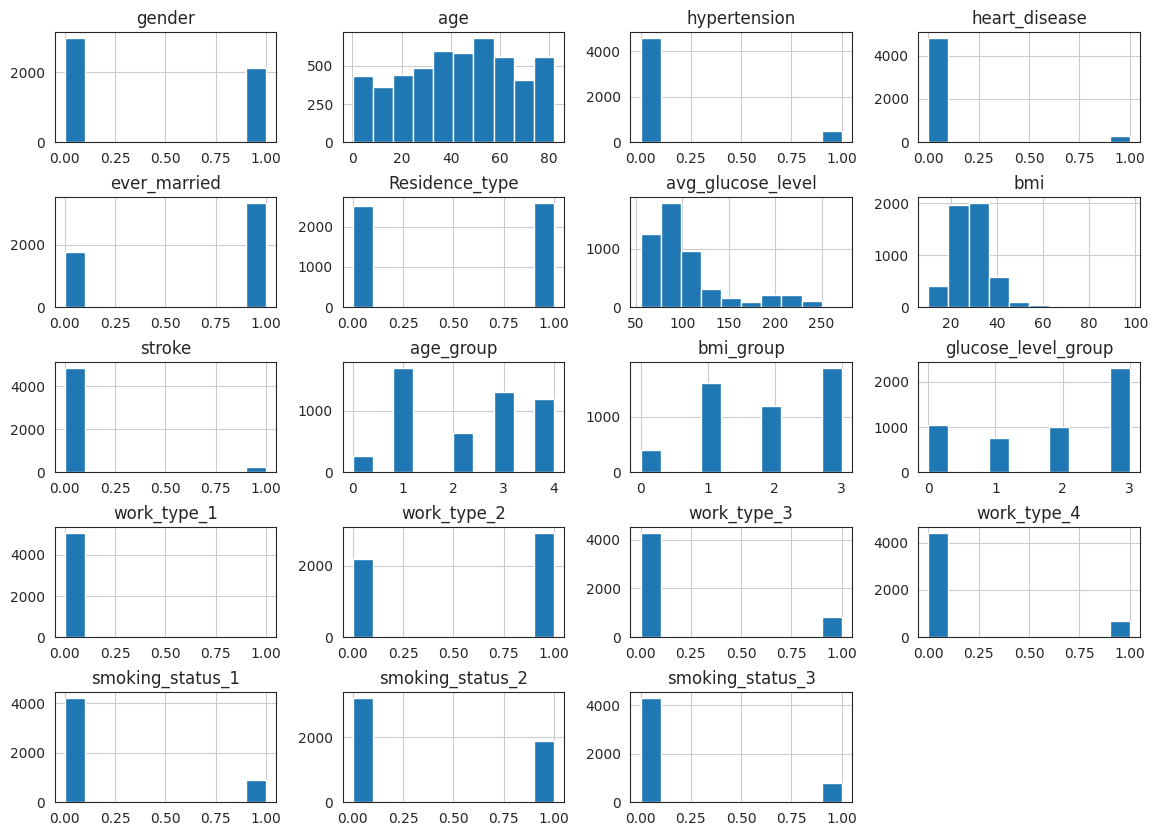

In [82]:
# Criar o histograma

ax = df.hist(bins= 10, 
        figsize=(14, 10)
        )

# Ajustar o tamanho da fonte dos rótulos dos eixos

plt.xticks(fontsize= 8)
plt.yticks(fontsize= 8)

# Aumentar o espaço entre os gráficos

plt.subplots_adjust(hspace=0.5)


plt.show()

# Construção do modelo

Para evitar vazamento de dados em nosso modelo preditivo, particionaremos nossos dados em 80% do conjunto de treinamento e 20% do conjunto de teste.

In [83]:
# Criando duas variáveis X e Y 
# Atribuindo a X o DataFrame sem a variável alvo
# Atribuindo a Y o DataFrame só com a variável alvo

X = df.drop('stroke', axis= 1)
y = df['stroke']

In [84]:
X.head(5)

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_group,bmi_group,glucose_level_group,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2,smoking_status_3
0,1,67.0,0,1,1,1,228.69,36.600000,3,3,2,0,1,0,0,1,0,0
1,0,61.0,0,0,1,0,202.21,28.893237,3,1,2,0,0,1,0,0,1,0
2,1,80.0,0,1,1,0,105.92,32.500000,3,3,0,0,1,0,0,0,1,0
3,0,49.0,0,0,1,1,171.23,34.400000,4,3,2,0,1,0,0,0,0,1
4,0,79.0,1,0,1,0,174.12,24.000000,3,2,2,0,0,1,0,0,1,0


In [85]:
y.head(5)

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

## Divisão dos dados

O código importa a função train_test_split do módulo model_selection da biblioteca scikit-learn (sklearn) e divide um conjunto de dados em conjuntos de treinamento e teste.

Vou explicar os diferentes componentes do código:

* from sklearn.model_selection import train_test_split importa a função train_test_split do módulo model_selection da biblioteca scikit-learn. Essa função é usada para dividir um conjunto de dados em conjuntos de treinamento e teste.

* X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) aplica a divisão dos dados. Aqui estão os argumentos da função:

* X é a matriz (ou DataFrame) contendo as features (características) do conjunto de dados.

* y é o vetor (ou Series) contendo os rótulos (labels) correspondentes às features do conjunto de dados.

* test_size=0.3 define a proporção do conjunto de teste em relação ao conjunto completo. Neste caso, o conjunto de teste será 30% dos dados totais, enquanto o conjunto de treinamento será 70%.

* random_state=42 define a semente (seed) para garantir a reprodutibilidade dos resultados. Ao usar o mesmo valor para random_state, a divisão dos dados será sempre a mesma, o que é útil para fins de comparação e reprodução dos resultados.

* X_train é a matriz (ou DataFrame) resultante das features do conjunto de treinamento.

* X_test é a matriz (ou DataFrame) resultante das features do conjunto de teste.

* y_train é o vetor (ou Series) resultante dos rótulos do conjunto de treinamento.

* y_test é o vetor (ou Series) resultante dos rótulos do conjunto de teste.

Portanto, o código divide os dados em conjuntos de treinamento e teste, onde X_train e y_train são usados para treinar um modelo e X_test e y_test são usados para avaliar o desempenho do modelo. A proporção de divisão é de 70% para treinamento e 30% para teste, e o valor 42 é usado como semente aleatória para garantir a reprodutibilidade dos resultados.

In [86]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 42)

In [87]:
x_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_group,bmi_group,glucose_level_group,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2,smoking_status_3
3897,1,4.00,0,0,0,0,90.42,16.2,2,0,3,0,0,0,1,0,0,0
576,1,29.00,0,0,0,1,207.58,22.8,1,2,2,0,1,0,0,0,0,1
4013,1,44.00,1,0,1,0,91.28,26.5,1,1,3,0,1,0,0,0,1,0
4536,0,68.00,1,0,1,1,150.74,40.3,3,3,2,0,1,0,0,0,0,0
1180,0,62.00,0,0,1,0,82.57,36.0,3,3,3,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1,43.00,0,0,1,0,88.00,30.6,1,3,3,0,0,0,0,0,1,0
466,0,61.00,1,0,1,0,170.05,60.2,3,3,2,0,1,0,0,0,0,1
3092,0,1.16,0,0,0,1,97.28,17.8,2,0,3,0,0,0,1,0,0,0
3772,1,80.00,0,0,1,0,196.08,31.0,3,3,2,0,0,1,0,1,0,0


In [88]:
y_train

3897    0
576     0
4013    0
4536    0
1180    0
       ..
4426    0
466     0
3092    0
3772    0
860     0
Name: stroke, Length: 3577, dtype: int64

Normalização dos dados

In [89]:
# Padronizando dados com a função StandardScaler()
# A biblioteca Python sklearn nos oferece a função StandardScaler() 
# para padronizar os valores de dados em um formato padrão.

scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [90]:
print(x_train_scaled)

[[ 1.18418048 -1.7467638  -0.31719928 ... -0.46547467 -0.77073246
  -0.42396856]
 [ 1.18418048 -0.63635252 -0.31719928 ... -0.46547467 -0.77073246
   2.35866546]
 [ 1.18418048  0.02989425  3.15259225 ... -0.46547467  1.29746709
  -0.42396856]
 ...
 [-0.84446587 -1.87290652 -0.31719928 ... -0.46547467 -0.77073246
  -0.42396856]
 [ 1.18418048  1.62888649 -0.31719928 ...  2.14834462 -0.77073246
  -0.42396856]
 [-0.84446587  0.11872715 -0.31719928 ... -0.46547467 -0.77073246
   2.35866546]]


# Treinamento de modelo de Machine Learning

## Logistic Regression ( Regressão Logística )

Realizado um ajuste de hiperparâmetros para um modelo de Regressão Logística utilizando a técnica de Grid Search Cross-Validation. 

In [91]:
# Criação do modelo de Regressão Logística

log_reg = LogisticRegression(class_weight='balanced')

Aqui, está sendo criada uma instância do modelo de Regressão Logística. O parâmetro class_weight='balanced' indica que o modelo deve tratar automaticamente o desbalanceamento de classes, dando mais peso para a classe minoritária.

In [92]:
# Definição do espaço de busca dos hiperparâmetros

param_grid = {
    'C': [0.01, 0.1, 1.0, 10, 100],
    'penalty': ['none', 'l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

Aqui, está sendo definido o espaço de busca dos hiperparâmetros para o Grid Search. O parâmetro C representa o parâmetro de regularização, penalty define a função de penalização utilizada e solver indica o algoritmo de otimização utilizado para encontrar os parâmetros do modelo.

In [93]:
# Criação do objeto GridSearchCV

grid_search = GridSearchCV(log_reg, param_grid, cv=5)

Aqui, está sendo criado o objeto GridSearchCV que irá realizar o ajuste de hiperparâmetros. O parâmetro log_reg é o modelo de Regressão Logística, param_grid é o espaço de busca dos hiperparâmetros definido anteriormente e cv=5 indica que será utilizada uma validação cruzada com 5 folds.

In [94]:
# Ajuste de hiperparâmetros

grid_search.fit(x_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(class_weight='balanced'),
             param_grid={'C': [0.01, 0.1, 1.0, 10, 100],
                         'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

Aqui, está sendo realizado o ajuste de hiperparâmetros utilizando o conjunto de treinamento escalado (X_train_scaled) e os rótulos de treinamento (y_train).

In [95]:
# Impressão dos melhores hiperparâmetros

print(grid_search.best_params_)

{'C': 0.01, 'penalty': 'none', 'solver': 'newton-cg'}


Aqui, é impresso na tela os melhores hiperparâmetros encontrados pelo Grid Search. Esses melhores hiperparâmetros são aqueles que apresentaram o melhor desempenho de acordo com a métrica utilizada durante o ajuste (por exemplo, acurácia, precisão, recall, etc.).

Obs. O objetivo desse código é encontrar os melhores hiperparâmetros para o modelo de Regressão Logística por meio da técnica de Grid Search Cross-Validation, a fim de obter um modelo com melhor desempenho em relação aos hiperparâmetros utilizados.

### Instanciar, ajustar e prever com a regressão logística

In [96]:
# Criação do modelo de Regressão Logística com os melhores hiperparâmetros

log_reg = LogisticRegression(C= 0.01, penalty='none', solver='newton-cg', class_weight='balanced')

Aqui, está sendo criada uma nova instância do modelo de Regressão Logística, porém com os melhores hiperparâmetros encontrados pelo Grid Search. Os hiperparâmetros especificados são: C=0.01 (parâmetro de regularização), penalty='none' (função de penalização), solver='newton-cg' (algoritmo de otimização) e class_weight='balanced' (tratamento do desbalanceamento de classes).

In [97]:
# Treinamento do modelo

log_reg.fit(x_train_scaled, y_train)

LogisticRegression(C=0.01, class_weight='balanced', penalty='none',
                   solver='newton-cg')

Aqui, está sendo realizado o treinamento do modelo de Regressão Logística com os dados de treinamento escalados (X_train_scaled) e os rótulos de treinamento (y_train).

In [98]:
# Previsão dos rótulos para os dados de teste

y_pred = log_reg.predict(x_test_scaled)


Aqui, está sendo feita a previsão dos rótulos para os dados de teste escalados (X_test_scaled). Os rótulos previstos são armazenados na variável y_pred.

In [99]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

Ao final desse código, você terá o modelo de Regressão Logística treinado com os melhores hiperparâmetros e as previsões dos rótulos para os dados de teste. A variável y_pred contém os rótulos previstos pelo modelo para os dados de teste. Essa informação pode ser utilizada para avaliar o desempenho do modelo, comparando as previsões com os rótulos verdadeiros.

In [100]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, recall_score, precision_score

In [101]:
# Verificar a pontuação de precisão do log_reg

# Cálculo da acurácia

log_reg_accuracy = accuracy_score(y_test, y_pred)

# Armazenamento do valor da acurácia

log_reg_accuracy

0.7384213959556425

Aqui, está sendo calculada a acurácia do modelo de Regressão Logística. A função accuracy_score() é utilizada para calcular a acurácia comparando os rótulos verdadeiros (y_test) com as previsões feitas pelo modelo (y_pred). A acurácia é uma métrica comum para avaliar a performance de modelos de classificação, e ela representa a proporção de observações corretamente classificadas em relação ao total de observações.

Aqui, o valor da acurácia calculada é armazenado na variável log_reg_accuracy.

Ao final desse código, a variável log_reg_accuracy conterá o valor da acurácia do modelo de Regressão Logística para os dados de teste. Esse valor representa a proporção de observações corretamente classificadas pelo modelo. Quanto maior o valor da acurácia, melhor é o desempenho do modelo. Essa métrica pode ser utilizada para comparar diferentes modelos ou diferentes configurações de hiperparâmetros e selecionar aquele que obtém o melhor desempenho.

In [102]:
# Avaliar e imprimir a precisão do conjunto de treino

log_reg_train_accuracy = log_reg.score(x_train_scaled, y_train)
log_reg_train_accuracy

0.7338551859099804

In [103]:
# Avaliar e imprimir a precisão do conjunto de teste

log_reg_test_accuracy = log_reg.score(x_test_scaled, y_test)
log_reg_test_accuracy

0.7384213959556425

Entendendo o que é Matriz de Confusão

É uma ferramenta muito usada para avaliações de modelos de classificação em Aprendizado de Máquina (mais comumente chamado de Machine Learning).

Para termos dados de exemplo, imagine que eu tivesse um modelo que, dada as características fisiológicas de uma paciente, dissesse que a mesma está grávida ou não. Porém, para o nosso contexto, eu só trarei uma lista com os dados reais, e uma lista de dados preditos pelo modelo, ambos dados fake.

<img alt="" class="bg ms mt c" width="513" height="80" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:513/1*TfoXaIAxmUdEr4q_jBIs6g.png">

Como saber se meu modelo previu bem? Como saber se ele prevê bem a classe que queremos (Grávida)? Essas e outras questões podemos entender com as matrizes de confusão.

O que são matrizes de confusão?

É um tabela que mostra as frequências de classificação para cada classe do modelo. Pegando o exemplo acima, ela vai nos mostrar as frequências:

* Verdadeiro positivo (true positive — TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. Por exemplo, quando a mulher está grávida e o modelo previu corretamente que ela está grávida.

* Falso positivo (false positive — FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente. Exemplo: a mulher não está grávida, mas o modelo disse que ela está.

* Falso verdadeiro (true negative — TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente. Exemplo: a mulher não estava grávida, e o modelo previu corretamente que ela não está.

* Falso negativo (false negative — FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente. Por exemplo, quando a mulher está grávida e o modelo previu incorretamente que ela não está grávida.

Ao final teremos para o conjunto acima

<img alt="" class="bg ms mt c" width="404" height="90" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:404/1*DYOERtaPlawq2-LDmFK5EA.png">

<img alt="" class="bg ms mt c" width="327" height="85" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:327/1*Glcsi60bv6wqGKN7ozDu3Q.png">

Assim, nosso modelo:

* Previu grávida 3 vezes corretamente
* Previu não grávidas 4 vezes corretamente
* Previu grávida 1 vez incorretamente
* Previu não grávida 2 vezes incorretamente

A seguir, analisaremos algumas informações úteis que podemos tirar dessa tabela

Alguns conceitos importantes decorrentes da matriz

* Acurácia
Diz quanto o meu modelo acertou das previsões possíveis. No contexto acima, nosso modelo teve uma acurácia de 70%, pois acertou 7 das 10 previsões. E a razão entre o somatório das previsões corretas (verdadeiros positivos com verdadeiros negativos) sobre o somatório das previsões.

<img alt="" class="bg ms mt c" width="589" height="87" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:589/1*tNTpugu1beoC3f6ivswnsA.png">

Mas isso é tudo?

* Recall
Recall responde a seguinte pergunta: qual proporção de positivos foi identificados corretamente? Em outras palavras, quão bom meu modelo é para prever positivos, sendo positivo entendido como a classe que se quer prever, no nosso contexto, se a mulher está grávida. É definido como a razão entre verdadeiros positivos sobre a soma de verdadeiros positivos com negativos falsos.

<img alt="" class="bg ms mt c" width="198" height="83" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:198/1*zgmkLfNNRtFwCHp8m46AKA.png">

* Precisão
Ainda usando o material do Google Developers, eles definem precisão como a resposta para a seguinte pergunta: Qual a proporção de identificações positivas foi realmente correta? Em outras palavras, o qual bem meu modelo trabalhou.

<img alt="" class="bg ms mt c" width="238" height="79" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:238/1*pJrHo_sp-pnLFl6Ww3imUw.png">

* f-score
Já o f-score nos mostra o balanço entre a precisão e o recall de nosso modelo. Sua fórmula é:

<img alt="" class="bg ms mt c" width="260" height="81" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:260/1*sBVtY3BJoJbOs47ZZx46tA.png">

Uma observação muito importante. Os cálculos acima visam entender o seu modelo sobre os dados positivos. Ou seja, quero prever se a paciente está grávida, portanto vou olhar métricas para avaliar essa classe. Quando estamos falando de classificação multiclass (mais de duas classes possíveis de resposta), podemos trabalhar sobre a classe que queremos prever, mas também podemos olhar para cada classe em separado. Para tanto, pode ser útil, na hora de fazer a matriz de confusão, considerar a classe que queremos prever como a classe positiva, e todo o restante como negativo, assim, “inferimos” uma classificação binária só para entender o quão bem o nosso modelo está em prever a classe que queremos.

O pacote metrics do sklearn, possui uma função muito interessante: classification_report, que entrega todas as métricas acima prontas em formato tabular, vale a pena a conferida. Tais métricas são consideradas para cada classe do nosso modelo. Um exemplo no print abaixo:

<img alt="" class="bg ms mt c" width="480" height="155" loading="lazy" role="presentation" src="https://miro.medium.com/v2/resize:fit:480/1*BML_JiMMg8_ZtZSrMs29MQ.png">

Matriz de Confusão : 
 [[1061  383]
 [  18   71]]


<function matplotlib.pyplot.show(close=None, block=None)>

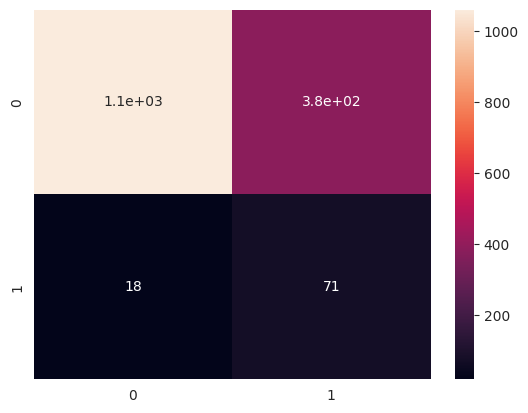

In [104]:
from sklearn.metrics import confusion_matrix

conf = confusion_matrix(y_test, y_pred)

print('Matriz de Confusão : \n',conf)

sns.heatmap(conf, annot = True)

plt.show

Vamos analisar os valores da matriz de confusão:

- Verdadeiro Positivo (True Positive, TP): O valor 1061 na posição (0, 0) indica o número de observações que foram corretamente classificadas como positivas (classe 1).

- Falso Positivo (False Positive, FP): O valor 383 na posição (0, 1) indica o número de observações que foram incorretamente classificadas como positivas (classe 1), mas na verdade são negativas (classe 0).

- Falso Negativo (False Negative, FN): O valor 18 na posição (1, 0) indica o número de observações que foram incorretamente classificadas como negativas (classe 0), mas na verdade são positivas (classe 1).

- Verdadeiro Negativo (True Negative, TN): O valor 71 na posição (1, 1) indica o número de observações que foram corretamente classificadas como negativas (classe 0).

A partir desses valores, podemos interpretar a matriz de confusão e obter algumas métricas de avaliação do modelo:

- Precisão (Precision): A precisão é a proporção de observações corretamente classificadas como positivas em relação ao total de observações classificadas como positivas. Nesse caso, a precisão pode ser calculada como TP / (TP + FP) = 1061 / (1061 + 383) ≈ 0.73476, ou seja, aproximadamente 73.48%.

- Revocação (Recall): A revocação é a proporção de observações corretamente classificadas como positivas em relação ao total de observações reais da classe positiva. Nesse caso, a revocação pode ser calculada como TP / (TP + FN) = 1061 / (1061 + 18) ≈ 0.9831, ou seja, aproximadamente 98.31%.

- Acurácia (Accuracy): A acurácia é a proporção de observações corretamente classificadas em relação ao total de observações. Nesse caso, a acurácia pode ser calculada como (TP + TN) / (TP + TN + FP + FN) = (1061 + 71) / (1061 + 71 + 383 + 18) ≈ 0.7384, ou seja, aproximadamente 73,84%.

Essas métricas fornecem uma avaliação do desempenho do modelo de classificação. No geral, observa-se uma alta precisão e revocação para a classe 1, indicando que o modelo é bom em identificar corretamente as observações positivas. No entanto, deve-se notar que o número de falsos negativos (65) é relativamente alto, o que indica que o modelo falha em classificar corretamente algumas observações positivas. A acurácia geral do modelo é de aproximadamente 92.39%, o que indica um bom desempenho geral em classificar corretamente as observações, considerando ambas as classes.

## Random Forest (Floresta Aleatória)

Realizado um ajuste de hiperparâmetros para um modelo de Random Forest utilizando a técnica de Grid Search Cross-Validation.

In [105]:
# Criação do modelo de Random Forest

rfc = RandomForestClassifier(class_weight='balanced')

Aqui, está sendo criada uma instância do modelo de Random Forest. O parâmetro class_weight='balanced' indica que o modelo deve tratar automaticamente o desbalanceamento de classes, dando mais peso para a classe minoritária.

In [106]:
# Definição do espaço de busca dos hiperparâmetros

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

Aqui, está sendo definido o espaço de busca dos hiperparâmetros para o Grid Search. O parâmetro n_estimators define o número de árvores na floresta, max_depth define a profundidade máxima das árvores, max_features indica o número de features a serem consideradas em cada divisão e random_state define a semente aleatória para reproducibilidade dos resultados.

In [107]:
# Criação do objeto GridSearchCV

grid_search = GridSearchCV(rfc, param_grid, cv=5)

Aqui, está sendo criado o objeto GridSearchCV que irá realizar o ajuste de hiperparâmetros. O parâmetro rfc é o modelo de Random Forest, param_grid é o espaço de busca dos hiperparâmetros definido anteriormente e cv=5 indica que será utilizada uma validação cruzada com 5 folds.

In [108]:
# Ajuste de hiperparâmetros

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'n_estimators': [100, 200], 'random_state': [0, 42]})

Aqui, está sendo realizado o ajuste de hiperparâmetros utilizando o conjunto de treinamento (X_train e y_train).

In [109]:
# Impressão dos melhores hiperparâmetros

print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 42}


Aqui, é impresso na tela os melhores hiperparâmetros encontrados pelo Grid Search. Esses melhores hiperparâmetros são aqueles que apresentaram o melhor desempenho de acordo com a métrica utilizada durante o ajuste.

O objetivo desse código é encontrar os melhores hiperparâmetros para o modelo de Random Forest por meio da técnica de Grid Search Cross-Validation, a fim de obter um modelo com melhor desempenho em relação aos hiperparâmetros utilizados.

### Instanciar, ajustar e prever com o Random Forest Classifier

In [110]:
# Criação do modelo de Random Forest Classifier com os hiperparâmetros

rfc = RandomForestClassifier(max_depth= None, max_features= 'sqrt', n_estimators= 100, random_state= 42, class_weight='balanced')

Aqui, está sendo criada uma instância do modelo de Random Forest Classifier. Os hiperparâmetros especificados são:

* max_depth=None: a profundidade máxima das árvores não está limitada, permitindo que as árvores cresçam até os nós folha.

* max_features='sqrt': o número máximo de features consideradas em cada divisão é igual à raiz quadrada do número total de features.

* n_estimators=100: o número de árvores na floresta é 100.

* random_state=42: define a semente aleatória para garantir a reproducibilidade dos resultados.

* class_weight='balanced': trata automaticamente o desbalanceamento de classes, atribuindo pesos diferentes às classes para compensar o desequilíbrio.

In [111]:
# Treinamento do modelo

rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

Aqui, o modelo de Random Forest Classifier é treinado com os dados de treinamento X_train e os rótulos de treinamento y_train. O modelo irá aprender a relação entre as features e os rótulos com base nesses dados.

In [112]:
# Previsão dos rótulos para os dados de teste

y_pred = rfc.predict(x_test)

Aqui, é feita a previsão dos rótulos para os dados de teste X_test utilizando o modelo treinado. Os rótulos previstos são armazenados na variável y_pred.

Ao final desse código, você terá o modelo de Random Forest Classifier treinado com os hiperparâmetros especificados e as previsões dos rótulos para os dados de teste. A variável y_pred contém os rótulos previstos pelo modelo para os dados de teste. Essa informação pode ser utilizada para avaliar o desempenho do modelo, comparando as previsões com os rótulos verdadeiros.

In [113]:
# Verificar a pontuação de precisão

rfc_accuracy = accuracy_score(y_test, y_pred)
rfc_accuracy

0.9406392694063926

In [114]:
# Avaliar e imprimir a precisão do conjunto de treino

rfc_train_accuracy = rfc.score(x_train, y_train)
rfc_train_accuracy

1.0

In [115]:
# Avaliar e imprimir a precisão do conjunto de teste

rfc_test_accuracy = rfc.score(x_test, y_test)
rfc_test_accuracy

0.9406392694063926

Matriz de Confusão : 
 [[1442    2]
 [  89    0]]


<function matplotlib.pyplot.show(close=None, block=None)>

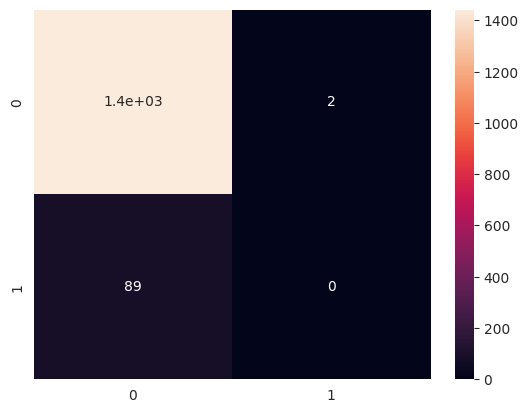

In [116]:
conf = confusion_matrix(y_test, y_pred)

print('Matriz de Confusão : \n',conf)

sns.heatmap(conf, annot = True)

plt.show

## Decision Tree ( Árvore de decisão )

A Árvore de Decisão é uma ferramenta de tomada de decisão que usa uma estrutura de árvore semelhante a um fluxograma ou é um modelo de decisões e todos os seus resultados possíveis, incluindo resultados, custos de insumos e utilidade.
O algoritmo de árvore de decisão se enquadra na categoria de algoritmos de aprendizado supervisionado. Ele funciona para variáveis ​​de saída contínuas e categóricas.

Os ramos/bordas representam o resultado do nó e os nós possuem: 

Condições [nós de decisão]
Resultado [nós finais]
Os ramos/arestas representam a veracidade/falsidade da afirmação e toma uma decisão com base no exemplo abaixo que mostra uma árvore de decisão que avalia o menor de três números:

<img src="https://media.geeksforgeeks.org/wp-content/uploads/decision-tree.jpg" alt="">

Regressão de Árvore de Decisão: 
A regressão de árvore de decisão observa características de um objeto e treina um modelo na estrutura de uma árvore para prever dados no futuro para produzir uma saída contínua significativa. Saída contínua significa que a saída/resultado não é discreto, ou seja, não é representado apenas por um conjunto discreto e conhecido de números ou valores.

Exemplo de saída discreta: um modelo de previsão do tempo que prevê se haverá ou não chuva em um determinado dia. 
Exemplo de saída contínua: Um modelo de previsão de lucro que indica o lucro provável que pode ser gerado com a venda de um produto.
Aqui, valores contínuos são previstos com a ajuda de um modelo de regressão de árvore de decisão.

Realizado um ajuste de hiperparâmetros para um modelo de Árvore de Decisão utilizando a técnica de Grid Search Cross-Validation.

In [117]:
# Criação do modelo de Árvore de Decisão

dt = DecisionTreeClassifier(class_weight='balanced')

Aqui, está sendo criada uma instância do modelo de Árvore de Decisão. O parâmetro class_weight='balanced' indica que o modelo deve tratar automaticamente o desbalanceamento de classes, dando mais peso para a classe minoritária.

In [118]:
# Definição do espaço de busca dos hiperparâmetros

param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

Aqui, está sendo definido o espaço de busca dos hiperparâmetros para o Grid Search. O parâmetro max_depth define a profundidade máxima da árvore, min_samples_split indica o número mínimo de amostras necessárias para dividir um nó interno, min_samples_leaf define o número mínimo de amostras requeridas em um nó folha e random_state define a semente aleatória para reproducibilidade dos resultados.

In [119]:
# Criação do objeto GridSearchCV

grid_search = GridSearchCV(dt, param_grid, cv=5)

Aqui, está sendo criado o objeto GridSearchCV que irá realizar o ajuste de hiperparâmetros. O parâmetro dt é o modelo de Árvore de Decisão, param_grid é o espaço de busca dos hiperparâmetros definido anteriormente e cv=5 indica que será utilizada uma validação cruzada com 5 folds.

In [120]:
# Ajuste de hiperparâmetros

grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]})

Aqui, está sendo realizado o ajuste de hiperparâmetros utilizando o conjunto de treinamento (X_train e y_train).

In [121]:
# Impressão dos melhores hiperparâmetros

print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 42}


Aqui, é impresso na tela os melhores hiperparâmetros encontrados pelo Grid Search. Esses melhores hiperparâmetros são aqueles que apresentaram o melhor desempenho de acordo com a métrica utilizada durante o ajuste.

O objetivo desse código é encontrar os melhores hiperparâmetros para o modelo de Árvore de Decisão por meio da técnica de Grid Search Cross-Validation, a fim de obter um modelo com melhor desempenho em relação aos hiperparâmetros utilizados.

### Instanciar, ajustar e prever com o DecisionTreeClassifier

In [122]:
dt = DecisionTreeClassifier(max_depth= 8, min_samples_leaf= 1, min_samples_split= 2, random_state= 42)
dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

In [123]:
# Verificar a pontuação de precisão

dt_accuracy = accuracy_score(y_test, y_pred)
dt_accuracy

0.9178082191780822

In [124]:
# Avaliar e imprimir a precisão do conjunto de treino

dt_train_accuracy = dt.score(x_train, y_train)
dt_train_accuracy

0.9728823036063741

In [125]:
# Avaliar e imprimir a precisão do conjunto de teste

dt_test_accuracy = dt.score(x_test, y_test)
dt_test_accuracy

0.9178082191780822

Matriz de Confusão : 
 [[1401   43]
 [  83    6]]


<function matplotlib.pyplot.show(close=None, block=None)>

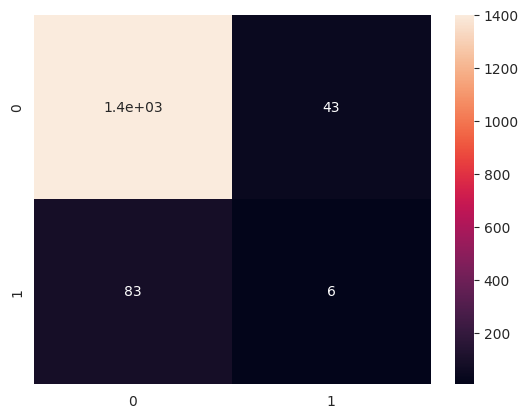

In [126]:
conf = confusion_matrix(y_test, y_pred)

print('Matriz de Confusão : \n',conf)

sns.heatmap(conf, annot = True)

plt.show

In [127]:
from sklearn import metrics
from sklearn.metrics import accuracy_score


print('\n Relatório de classificação %s:\n%s\n' % (dt, 
metrics.classification_report(y_test, y_pred)))


 Relatório de classificação DecisionTreeClassifier(max_depth=8, random_state=42):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1444
           1       0.12      0.07      0.09        89

    accuracy                           0.92      1533
   macro avg       0.53      0.52      0.52      1533
weighted avg       0.90      0.92      0.91      1533




A saída que você apresentou é uma tabela que contém algumas métricas de avaliação do modelo de classificação. Vamos analisar as métricas uma por uma:

- Precision (Precisão): A precisão é a proporção de observações classificadas corretamente como positivas em relação ao total de observações classificadas como positivas. Para a classe 0, a precisão é de 0.95, o que significa que 95% das observações classificadas como classe 0 são realmente da classe 0. Para a classe 1, a precisão é de 0.09, indicando que apenas 9% das observações classificadas como classe 1 são realmente da classe 1.

- Recall (Revocação): A revocação é a proporção de observações classificadas corretamente como positivas em relação ao total de observações reais da classe positiva. Para a classe 0, o recall é de 0.95, o que significa que 95% das observações da classe 0 foram corretamente identificadas como tal. Para a classe 1, o recall é de 0.10, indicando que apenas 10% das observações da classe 1 foram corretamente identificadas como tal.

- F1-score: O F1-score é uma média harmônica entre precisão e recall, fornecendo uma medida de desempenho balanceada entre as duas métricas. Para a classe 0, o F1-score é de 0.95, e para a classe 1, é de 0.10.

- Support (Suporte): O suporte é o número de observações reais em cada classe. Para a classe 0, o suporte é de 1401, indicando que há 1401 observações reais da classe 0. Para a classe 1, o suporte é de 72.

- Accuracy (Acurácia): A acurácia é a proporção de observações classificadas corretamente em relação ao total de observações. Nesse caso, a acurácia é de 0.91, o que significa que o modelo classificou corretamente 91% das observações.

- Macro avg (Média macro): A média macro é a média não ponderada das métricas de precisão, recall e F1-score em todas as classes. Nesse caso, a média macro para precisão, recall e F1-score é de 0.52.

- Weighted avg (Média ponderada): A média ponderada é a média das métricas de precisão, recall e F1-score ponderadas pelo suporte de cada classe. Nesse caso, a média ponderada para precisão, recall e F1-score é de 0.91.

Essas métricas fornecem informações sobre o desempenho do modelo de classificação, permitindo avaliar sua eficácia na tarefa de classificação. No geral, observa-se que o modelo tem um desempenho melhor para a classe 0 em comparação com a classe 1, com uma alta precisão, recall e F1-score para a classe 0, enquanto para a classe 1 essas métricas são bastante baixas.

## XGBoost

O XGBoost é uma das estruturas de aprendizado de máquina mais populares entre os cientistas de dados. De acordo com a Kaggle State of Data Science Survey 2021 , quase 50% dos entrevistados disseram que usaram o XGBoost, ficando abaixo apenas do TensorFlow e do Sklearn.

In [128]:
# Criando uma instância do modelo XGBoost

xgb_classifier = XGBClassifier()
xgb_classifier.fit(x_train, y_train)
y_pred = xgb_classifier.predict(x_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.31      0.06      0.10        89

    accuracy                           0.94      1533
   macro avg       0.63      0.52      0.53      1533
weighted avg       0.91      0.94      0.92      1533



* A primeira linha cria uma instância do classificador XGBoost utilizando a configuração padrão.

* A segunda linha treina o modelo utilizando os dados de treinamento x_train e os rótulos de treinamento y_train.

* A terceira linha faz previsões para os dados de teste x_test utilizando o modelo treinado. As previsões são armazenadas na variável y_pred.

### Utilizando o XGBoost com hiperparâmetros

In [129]:
# Criação e treinamento de outro modelo XGBoost com hiperparâmetros personalizados

xgb = XGBClassifier(random_state=5, n_estimators=100, max_depth=15, learning_rate=1.0)
xgb.fit(x_train, y_train)
xgb.feature_importances_
y_pred_xgb = xgb.predict(x_test)
print(classification_report(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1444
           1       0.25      0.07      0.11        89

    accuracy                           0.93      1533
   macro avg       0.60      0.53      0.54      1533
weighted avg       0.90      0.93      0.92      1533



* A primeira linha cria uma nova instância do classificador XGBoost com os seguintes hiperparâmetros:
    
    * random_state=5: define a semente aleatória para garantir a reprodutibilidade dos resultados.

    * n_estimators=100: define o número de árvores de decisão a serem utilizadas no modelo.

    * max_depth=15: define a profundidade máxima de cada árvore de decisão.

    * learning_rate=1.0: define a taxa de aprendizado do modelo.

* A segunda linha treina o novo modelo utilizando os mesmos dados de treinamento x_train e y_train.

* A terceira linha obtém as importâncias das features do modelo, ou seja, o grau de influência de cada feature nas previsões do modelo.

* A quarta linha faz previsões para os dados de teste x_test utilizando o novo modelo treinado. As previsões são armazenadas na variável y_pred_rf.

* A última linha imprime um relatório de classificação que compara as previsões y_pred_rf com os rótulos verdadeiros y_test. O relatório inclui várias métricas de avaliação, como precisão, recall, F1-score, entre outras.

Esse código cria e treina modelos XGBoost com diferentes configurações de hiperparâmetros e faz previsões utilizando esses modelos. O objetivo é avaliar o desempenho dos modelos e comparar as previsões com os rótulos verdadeiros.

In [130]:
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
xgb_accuracy

0.9341161121983039

In [131]:
xgb_train_accuracy = xgb.score(x_train, y_train)
xgb_train_accuracy

1.0

In [132]:
xgb_test_accuracy = xgb.score(x_test, y_test)
xgb_test_accuracy

0.9341161121983039

Matriz de Confusão : 
 [[1426   18]
 [  83    6]]


<function matplotlib.pyplot.show(close=None, block=None)>

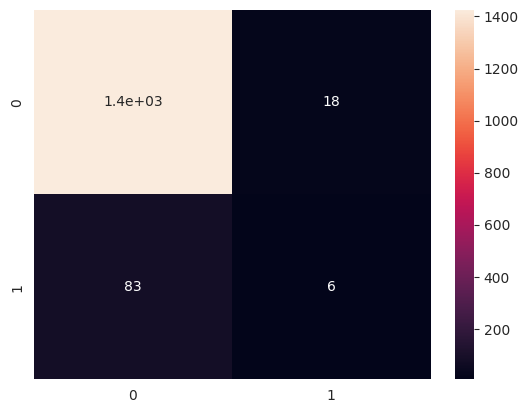

In [133]:
conf = confusion_matrix(y_test, y_pred_xgb)
print('Matriz de Confusão : \n',conf)
sns.heatmap(conf, annot = True)
plt.show

## SVC

Cria uma instância do modelo SVC (Support Vector Classifier) da biblioteca scikit-learn. O SVC é um algoritmo de aprendizado de máquina supervisionado utilizado para classificação.

svc = SVC()

Neste caso, estamos criando uma instância do modelo SVC sem especificar quaisquer parâmetros. Isso significa que o modelo usará os valores padrão para os parâmetros.

Os parâmetros padrão do SVC podem variar dependendo da versão da biblioteca scikit-learn. No entanto, alguns parâmetros comuns incluem:

* C: Parâmetro de regularização. Controla o trade-off entre ajustar corretamente os dados de treinamento e ter uma superfície de decisão suave. Um valor maior de C implica em uma classificação mais precisa dos dados de treinamento, mas pode levar a uma superfície de decisão mais complexa.
* kernel: Define o tipo de função de kernel a ser usada. Alguns exemplos comuns são 'linear', 'poly', 'rbf' e 'sigmoid'.
* gamma: Parâmetro do kernel 'rbf', 'poly' e 'sigmoid'. Controla a influência dos exemplos de treinamento no modelo. Valores menores de gamma levam a um alcance de influência maior.
É recomendável ajustar os parâmetros do modelo SVC para obter o melhor desempenho em seu problema específico. Você pode fazer isso fornecendo valores personalizados para os parâmetros durante a criação da instância do modelo ou usando técnicas de busca de hiperparâmetros, como GridSearchCV, para encontrar a combinação ideal de parâmetros para o seu conjunto de dados.

In [134]:
# Criando uma instância do modelo

svc_modelo = SVC(kernel= 'rbf', C= 1.0, gamma= 'scale', probability= True)


In [135]:
# Treinando o modelo

svc_modelo.fit(x_train, y_train)

SVC(probability=True)

In [136]:
# Fazendo previsões

y_pred_svc = svc_modelo.predict(x_test)

In [137]:
svc_accuracy = accuracy_score(y_test, y_pred_svc)
svc_accuracy

0.9419439008480104

In [138]:
svc_train_accuracy = svc_modelo.score(x_train, y_train)
svc_train_accuracy

0.9552697791445345

In [139]:
svc_test_accuracy = svc_modelo.score(x_test, y_test)
svc_test_accuracy

0.9419439008480104

In [140]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



Matriz de Confusão : 
 [[1444    0]
 [  89    0]]


<function matplotlib.pyplot.show(close=None, block=None)>

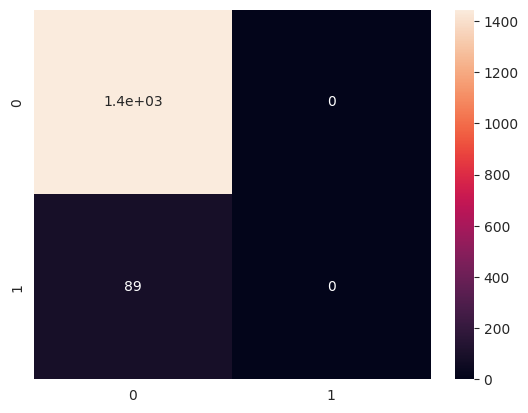

In [141]:
conf = confusion_matrix(y_test, y_pred_svc)
print('Matriz de Confusão : \n',conf)
sns.heatmap(conf, annot = True)
plt.show

## GridSearchCV e RandomizedSearchCV

 Importa as classes GridSearchCV e RandomizedSearchCV da biblioteca sklearn.model_selection. Essas classes são utilizadas para realizar a busca de hiperparâmetros (hyperparameter tuning) em modelos de aprendizado de máquina.

A busca de hiperparâmetros é um processo para encontrar a combinação ideal de valores de hiperparâmetros que resulta no melhor desempenho do modelo. Isso é feito através da avaliação sistemática de diferentes combinações de valores de hiperparâmetros e medindo o desempenho do modelo em uma métrica de avaliação, como acurácia, precisão ou recall.

* GridSearchCV: Essa classe implementa uma busca exaustiva sobre uma grade de hiperparâmetros especificados. Ela recebe um estimador (modelo), uma grade de hiperparâmetros e uma métrica de avaliação como entrada, e realiza uma validação cruzada para avaliar o desempenho do modelo em cada combinação de hiperparâmetros.

* RandomizedSearchCV: Essa classe implementa uma busca aleatória sobre um espaço de hiperparâmetros especificado. Ela recebe um estimador (modelo), uma distribuição de hiperparâmetros e uma métrica de avaliação como entrada, e amostra aleatoriamente combinações de hiperparâmetros do espaço especificado. Em seguida, ela realiza uma validação cruzada para avaliar o desempenho do modelo em cada combinação.

Essas classes são muito úteis para encontrar a combinação ideal de hiperparâmetros, especialmente quando o espaço de busca é grande e é impraticável avaliar todas as combinações possíveis. Elas automatizam o processo de busca de hiperparâmetros e fornecem a melhor combinação encontrada, juntamente com o desempenho do modelo correspondente.

In [142]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

Hiperparâmetros que podem ser usados na busca de hiperparâmetros. Essa grade define diferentes valores para os parâmetros n_estimators, criterion, max_features e random_state. Aqui está a definição dos parâmetros:

params = {
    'n_estimators': [10, 20, 50, 70, 80, 100, 120],
    'criterion': ['entropy', 'gini'],
    'max_features': ['auto', 5, 7, 10, 15],
    'random_state': range(0, 10)
}

* n_estimators: Uma lista de valores que define o número de estimadores (árvores) no modelo. Esses valores serão testados durante a busca de hiperparâmetros.

* criterion: Uma lista de valores que define o critério de divisão usado para construir as árvores de decisão. Os dois critérios disponíveis são "entropy" (entropia) e "gini". Ambos serão testados durante a busca de hiperparâmetros.

* max_features: Uma lista de valores que define o número máximo de características a serem consideradas em cada divisão. Os valores possíveis incluem "auto" (todas as características), números inteiros que representam a quantidade de características e números float que representam a proporção de características. Esses valores serão testados durante a busca de hiperparâmetros.

* random_state: Uma faixa de valores que define o estado aleatório do modelo. Serão testados valores de 0 a 9 durante a busca de hiperparâmetros.

Esses são apenas exemplos de valores para os parâmetros. Você pode ajustar essa grade de acordo com as necessidades do seu problema e a faixa de valores que deseja testar durante a busca de hiperparâmetros.

In [143]:
params = {
    'n_estimators': [10, 20, 50, 70, 80, 100, 120],
    'criterion': ['entropy', 'gini'],
    'max_features': ['auto', 5, 7, 10, 15],
    'random_state': range(0, 10)
}

In [144]:
# Atribuir o parametro ao modelo

# Criando uma instância do modelo

model_cv = RandomizedSearchCV(RandomForestClassifier(), params)

In [145]:
# Treinando o modelo

model_cv.fit(x_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_features': ['auto', 5, 7, 10, 15],
                                        'n_estimators': [10, 20, 50, 70, 80,
                                                         100, 120],
                                        'random_state': range(0, 10)})

In [146]:
# Visualisar o melhor parametro

model_cv.best_params_

{'random_state': 2,
 'n_estimators': 50,
 'max_features': 5,
 'criterion': 'entropy'}

In [147]:
# Visualisar o melhor parametro

model_cv.best_estimator_

RandomForestClassifier(criterion='entropy', max_features=5, n_estimators=50,
                       random_state=2)

In [148]:
model_cv.best_score_


0.9544298159940616

In [149]:
# Fazendo previsões

y_pred_cv = model_cv.predict(x_test)

In [150]:
cv_accuracy = accuracy_score(y_test, y_pred_cv)
cv_accuracy

0.9393346379647749

In [151]:
cv_train_accuracy = model_cv.score(x_train, y_train)
cv_train_accuracy

0.99916130835896

In [152]:
cv_test_accuracy = model_cv.score(x_test, y_test)
cv_test_accuracy

0.9393346379647749

In [153]:
print(classification_report(y_test, y_pred_cv))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533



Matriz de Confusão : 
 [[1440    4]
 [  89    0]]


<function matplotlib.pyplot.show(close=None, block=None)>

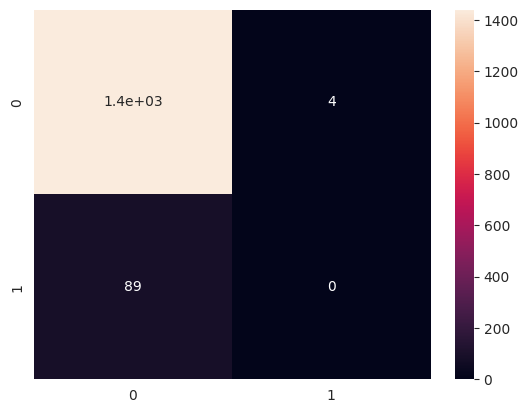

In [154]:
conf = confusion_matrix(y_test, y_pred_cv)
print('Matriz de Confusão : \n',conf)
sns.heatmap(conf, annot = True)
plt.show

## Statsmodels

In [155]:
x_train_com_constante = sm.add_constant(x_train)

In [156]:
x_train_com_constante

,const,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_group,bmi_group,glucose_level_group,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2,smoking_status_3
3897,1.0,1,4.00,0,0,0,0,90.42,16.2,2,0,3,0,0,0,1,0,0,0
576,1.0,1,29.00,0,0,0,1,207.58,22.8,1,2,2,0,1,0,0,0,0,1
4013,1.0,1,44.00,1,0,1,0,91.28,26.5,1,1,3,0,1,0,0,0,1,0
4536,1.0,0,68.00,1,0,1,1,150.74,40.3,3,3,2,0,1,0,0,0,0,0
1180,1.0,0,62.00,0,0,1,0,82.57,36.0,3,3,3,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1.0,1,43.00,0,0,1,0,88.00,30.6,1,3,3,0,0,0,0,0,1,0
466,1.0,0,61.00,1,0,1,0,170.05,60.2,3,3,2,0,1,0,0,0,0,1
3092,1.0,0,1.16,0,0,0,1,97.28,17.8,2,0,3,0,0,0,1,0,0,0
3772,1.0,1,80.00,0,0,1,0,196.08,31.0,3,3,2,0,0,1,0,1,0,0


In [157]:
modelo_statsmodels = sm.OLS(y_train, x_train_com_constante, hasconst= True).fit()

In [158]:
# Avaliando as estatísticas de teste do modelo

print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:                 stroke   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.078
Method:                 Least Squares   F-statistic:                     17.69
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           3.21e-54
Time:                        13:03:20   Log-Likelihood:                 716.69
No. Observations:                3577   AIC:                            -1395.
Df Residuals:                    3558   BIC:                            -1278.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.0986    

A análise do resultado do modelo de regressão linear pelo método OLS (Ordinary Least Squares) é a seguinte:

- R-quadrado (R-squared): O valor de 0.082 indica que o modelo explica aproximadamente 8.2% da variabilidade dos dados de resposta (variável dependente), ou seja, a relação linear entre as variáveis explicativas (variáveis independentes) e a variável de resposta é fraca.

- R-quadrado ajustado (Adj. R-squared): O valor de 0.078 é semelhante ao R-quadrado, mas ajustado em relação ao número de variáveis explicativas. Nesse caso, também indica que o modelo tem baixa capacidade de explicar a variabilidade dos dados.

- F-statistic: O valor de 17.69 indica que o modelo global é estatisticamente significativo, sugerindo que pelo menos uma das variáveis explicativas tem um efeito estatisticamente significativo na variável de resposta.

- Prob (F-statistic): O valor muito baixo de 3.21e-54 indica uma forte evidência contra a hipótese nula de que todas as variáveis explicativas têm coeficientes iguais a zero. Em outras palavras, pelo menos uma das variáveis explicativas é significativa para prever a variável de resposta.

- Coeficientes: Cada variável explicativa tem um coeficiente estimado e um valor p associado. O coeficiente estimado indica a mudança esperada na variável de resposta para um aumento de uma unidade na variável explicativa, mantendo todas as outras variáveis constantes. O valor p indica a significância estatística desse coeficiente. Se o valor p for menor que o nível de significância escolhido (geralmente 0.05), considera-se que o coeficiente é estatisticamente significativo.

- Notas: As notas fornecem informações adicionais, como a suposição de erros não robustos e a presença de multicolinearidade ou outros problemas numéricos.

No geral, com base nos resultados apresentados, o modelo de regressão linear não parece ser um bom ajuste para os dados, pois o R-quadrado e o R-quadrado ajustado são baixos. Além disso, algumas variáveis explicativas não são estatisticamente significativas, conforme indicado pelos valores p. Também é mencionado que pode haver multicolinearidade ou outros problemas numéricos, sugerindo a necessidade de uma análise mais aprofundada dos dados e possíveis ajustes no modelo.

In [159]:
x_train_com_constante = sm.add_constant(x_train)
x_train_com_constante

,const,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,age_group,bmi_group,glucose_level_group,work_type_1,work_type_2,work_type_3,work_type_4,smoking_status_1,smoking_status_2,smoking_status_3
3897,1.0,1,4.00,0,0,0,0,90.42,16.2,2,0,3,0,0,0,1,0,0,0
576,1.0,1,29.00,0,0,0,1,207.58,22.8,1,2,2,0,1,0,0,0,0,1
4013,1.0,1,44.00,1,0,1,0,91.28,26.5,1,1,3,0,1,0,0,0,1,0
4536,1.0,0,68.00,1,0,1,1,150.74,40.3,3,3,2,0,1,0,0,0,0,0
1180,1.0,0,62.00,0,0,1,0,82.57,36.0,3,3,3,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4426,1.0,1,43.00,0,0,1,0,88.00,30.6,1,3,3,0,0,0,0,0,1,0
466,1.0,0,61.00,1,0,1,0,170.05,60.2,3,3,2,0,1,0,0,0,0,1
3092,1.0,0,1.16,0,0,0,1,97.28,17.8,2,0,3,0,0,0,1,0,0,0
3772,1.0,1,80.00,0,0,1,0,196.08,31.0,3,3,2,0,0,1,0,1,0,0


E ele gerou a estimativa da constante const

Também aqui temos o teste t com as estatísticas para cada variável. P>|t| é o equivalente ao Prob (F-statistic) então funciona da mesma maneira que ele. Identificamos que o parâmetro não é estatisticamente significativo, ou seja, ele tá dizendo que esse parâmetro. Nota-se, portanto, que o parâmetro log_Dist_Farmacia não passa no testes, que testa se "esse cara é igual a zero ou não".

O teste T testa a significância individual dos parâmetros e o teste F a significância conjunta dos parâmetros, ou seja, T se ele é zero ou não e se todos são zero ou não conjuntamente.

Agora entendemos os testes mais importantes e no próximo videos vamos reestimar o modelo eliminando' log_Dist_Farme vendo o que acontece com as estatísticas e também com os outros parâmetros/variáveis.

# Conclusões

## Verificar a importância das veriáveis

In [160]:
feature_imp_df = pd.DataFrame({
    'Feature Name': x_train.columns,
    'Importance': dt.feature_importances_
})

sorted_feature_imp = feature_imp_df.sort_values(by='Importance', ascending=False)
top10_feature_imp = sorted_feature_imp.head(10)

Para obter as importâncias das features de um modelo de Árvore de Decisão:

1. Criação de um DataFrame `feature_imp_df`:
   - A primeira linha cria um DataFrame chamado `feature_imp_df` com duas colunas: 'Feature Name' e 'Importance'.
   - A coluna 'Feature Name' recebe os nomes das colunas/features do conjunto de treinamento `X_train.columns`.
   - A coluna 'Importance' recebe as importâncias das features, que são obtidas do modelo de Árvore de Decisão utilizando o atributo `feature_importances_` do modelo.

2. Ordenação das importâncias das features:
   - A terceira linha cria um novo DataFrame chamado `sorted_feature_imp` que contém as mesmas colunas do `feature_imp_df`.
   - O `sorted_feature_imp` é obtido a partir da ordenação do `feature_imp_df` pelo valor da coluna 'Importance', em ordem decrescente (`ascending=False`).

3. Seleção das top 10 features mais importantes:
   - A quarta linha cria um novo DataFrame chamado `top10_feature_imp` que contém as top 10 features mais importantes.
   - Essa seleção é feita a partir do DataFrame `sorted_feature_imp` utilizando o método `head(10)` para retornar as primeiras 10 linhas (ou seja, as 10 features com as maiores importâncias).

Em resumo, esse código cria um DataFrame que contém as importâncias das features de um modelo de Árvore de Decisão. Em seguida, ordena as importâncias em ordem decrescente e seleciona as top 10 features mais importantes. Esse processo permite identificar as features que têm maior influência nas previsões do modelo.

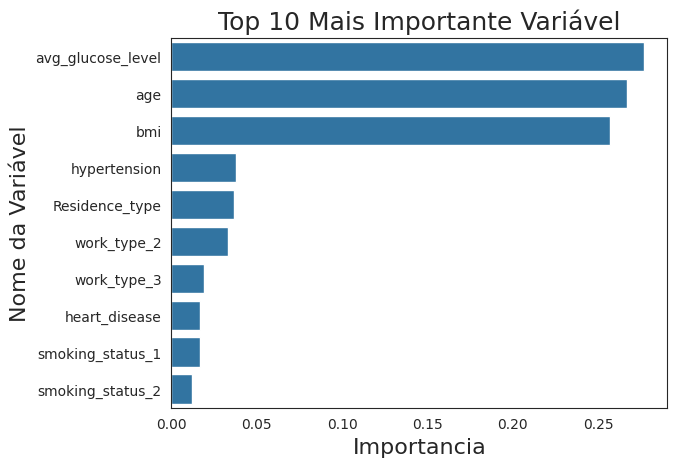

In [161]:
# Visualizar a importância de cada variável

sns.barplot(data=top10_feature_imp, x='Importance', y='Feature Name')
plt.title('Top 10 Mais Importante Variável', fontsize=18)
plt.xlabel('Importancia', fontsize=16)
plt.ylabel('Nome da Variável', fontsize=16)
plt.show();

Obs: No gráfico mostra que o nível de Glicose é a característica mais importante para prever o AVC*

## Comparar a precisão dos modelos implantamos

In [162]:
data = {'classifier': ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'SVC', 'GridSearchCV'],
       '% Training Accuracy':[log_reg_train_accuracy*100, rfc_train_accuracy*100, dt_train_accuracy*100, xgb_train_accuracy*100, svc_train_accuracy*100, cv_train_accuracy*100],
       '% Test Accuracy': [log_reg_test_accuracy*100, rfc_test_accuracy*100, dt_test_accuracy*100, xgb_test_accuracy*100, svc_test_accuracy*100, cv_test_accuracy*100],
       '% Model Accuracy': [log_reg_accuracy*100, rfc_accuracy*100, dt_accuracy*100, xgb_accuracy*100, svc_accuracy*100, cv_accuracy*100]}
df = pd.DataFrame(data)
df

,classifier,% Training Accuracy,% Test Accuracy,% Model Accuracy
0,Logistic Regression,73.385519,73.842140,73.842140
1,Random Forest,100.000000,94.063927,94.063927
2,Decision Tree,97.288230,91.780822,91.780822
3,XGBoost,100.000000,93.411611,93.411611
4,SVC,95.526978,94.194390,94.194390
5,GridSearchCV,99.916131,93.933464,93.933464


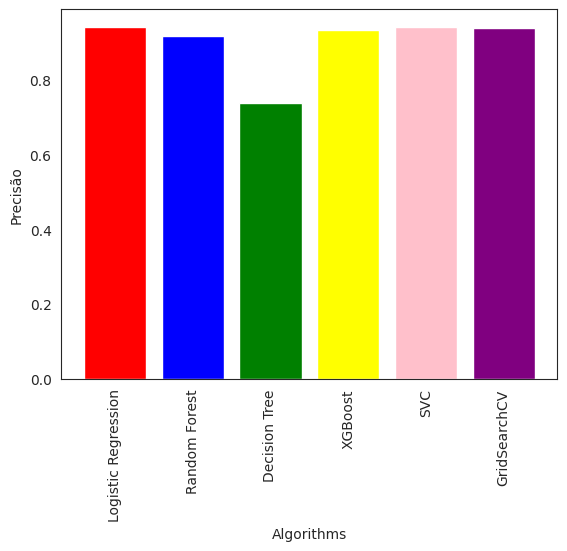

In [163]:
# Visualizar essa comparação

models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost', 'SVC', 'GridSearchCV']
accuracy = [rfc_accuracy, dt_accuracy, log_reg_accuracy, xgb_accuracy, svc_accuracy, cv_accuracy]
plt.bar(models, accuracy, color=['red', 'blue', 'green', 'yellow', 'pink', 'purple'])
plt.xlabel('Algorithms')
plt.ylabel('Precisão')
plt.xticks(rotation= 90)
plt.show();

Obs: o algoritmo SVC com pontuação de precisão de 94,19% teve melhor desempenho